# Chapter 2. 試著利用機器學習進行分析

這章要學習執行程式的流程，以便學習機器的基礎。

> _**以下內容會傾向使用統計學的模式說明 K-means、Random Forest、與 SVM / SVR 這幾個主題**_
>
> 每個 _Section_ 中內的 _Step A_ 主要是在解釋原理，讓你可以追溯到後面的一些數學模型，讓你對自己在操作的內容比較有一個概念。機器學習涉及到的領域包含 線性代數、實分析（在台灣稱為高等微積分）、初等統計學、統計推論（含數理統計與機率論）、還有一些離散數學、資料結構與演算法。不一定需要熟透每一個數學細節，但至少要知道自己在「應用」的東西，有哪些背景知識

## Section 1. Exploratory Data Analysis

在開始建立各種模型之前，要先透過 EDA 了解目前資料的現狀，而 EDA 背後就是統計與機率。因此這邊會先定義基本的機率論內容

### Step A. 相關數學定義與性質

> 這裡數學式看不懂沒關係，但還是建議了解一下這些東西在機器學習中是很常用的

#### A.1 統計學相關

所謂 EDA 就是會使用樣本 $\mathcal{D}$ 進行系統性的資料探索，結構、異常點、變數間的關係，並形成關於母體聯合機率分佈 $P(\mathbf{X}, Y)$ 的初步假設，可以分為 **離散型（Discrete） 與 連續型（Continuous）**。其中樣本 $\mathcal{D}$ 定義為 

$$
\mathcal{D} = \{ (\mathbf{x}_i, y_i) \}_{i=1}^{n}
$$

而 **聯合機率分佈 Joint Probability Distribution** 主要可以分為以下兩種：

- Discrete 資料 的聯合分佈會使用 _聯合機率 質量 函數_ $P(\mathbf{x}, y)$ 描述所有可能的 $(\mathbf{x}, y)$ 組合，而函數值 $P(\mathbf{X}=\mathbf{x}, Y=y)$ 必須介於 $[0, 1]$ 之間，且所有組合的機率總和必須滿足
   
   $$
   \sum_{\mathbf{x}} \sum_{y} P(\mathbf{X}=\mathbf{x}, Y=y) = 1
   $$

- **Continuous 資料** 的聯合分佈會使用 _聯合機率 **密度** 函數_ $f_{\mathbf{X}, Y}(\mathbf{x}, y)$ 定義，若 $\mathbf{X}$ 空間中的區域 $A$ 和在 $Y$ 空間中的區域 $B$， $(\mathbf{X}, Y)$ 落在 $(A, B)$ 區域的機率為
   
   $$
   P(\mathbf{X} \in A, Y \in B) = \iint_{A \times B} f_{\mathbf{X}, Y}(\mathbf{x}, y) d\mathbf{x} dy
   $$
   
   其中 $\mathcal{S}$ 為樣本空間，密度函數在整個空間上的積分必須等於 1，且密度為非負值

   $$
   \iint_{\mathcal{S}} f_{\mathbf{X}, Y}(\mathbf{x}, y) \, d\mathbf{x} \, dy = 1, \quad f_{\mathbf{X}, Y}(\mathbf{x}, y) \ge 0
   $$

以上相關內容可以參考 [R. D. Yates and D. J. Goodman, _Probability and Stochastic Processes: A Friendly Introduction for Electrical and Computer Engineers_, 3rd ed. Hoboken, NJ, USA: Wiley, 2014.](https://www.amazon.com/Probability-Stochastic-Processes-Introduction-Electrical/dp/1118324560)

#### A.2 線性代數相關

PCA 技術的現代計算方法與幾何轉換，與 SVD（奇異值分解）有很直接的關聯。而 SVD 是一種把任意矩陣 $X \in \mathcal{F}^{n \times p}$（即不限定方陣）提取出矩陣特徵的方式，那這就跟矩陣的特徵值（Eigenvalue）有關

1. 先從 Eigenvalue 說起：給定方陣 $A$ 為

   $$
   A = \begin{pmatrix} 3 & 0 \\ 0 & 2 \end{pmatrix}
   $$

   $A$ 會把任何向量的 $x$ 分量乘以 3、 $y$ 分量乘以 2；換句話說就是在水平方向上把平面拉伸 3 倍，在垂直方向上拉伸 2 倍。現在隨機選一個向量，如以下旋轉右上 45 度的方向： 

   $$
   v = \begin{pmatrix} 1 \\ 1 \end{pmatrix}
   $$

   可以計算

   $$
   Av = \begin{pmatrix} 3 & 0 \\ 0 & 2 \end{pmatrix} \begin{pmatrix} 1 \\ 1 \end{pmatrix} = \begin{pmatrix} 3 \times 1 + 0 \times 1 \\ 0 \times 1 + 2 \times 1 \end{pmatrix} = \begin{pmatrix} 3 \\ 2 \end{pmatrix}
   $$

   這時輸入和輸出的方向不一樣了，因為輸入向量在 $y=x$ 這條線上，而輸出向量在 $y = \frac{2}{3}x$ 這條線上。而對於大多數的向量，$A$ 不僅會改變向量的長度，還會改變向量的方向

   現在有一個關鍵問題：有沒有哪些「特殊」的向量被 $A$ 轉換後，方向完全不變，只有長度被縮放？嘗試選一個完全躺在 $x$ 軸上的向量，比如 $v_1 = \begin{pmatrix} 1 & 0 \end{pmatrix}^T$ 帶入 $A$ 計算

   $$
   Av_1 = \begin{pmatrix} 3 & 0 \\ 0 & 2 \end{pmatrix} \begin{pmatrix} 1 \\ 0 \end{pmatrix} = \begin{pmatrix} 3 \\ 0 \end{pmatrix}
   $$

   向量 $\begin{pmatrix} 3 & 0 \end{pmatrix}^T$ 仍然在 $x$ 軸上，可以發現輸出向量恰好是輸入向量的 3 倍。因此對於一個方陣，那些經過轉換後方向不變的特殊向量，就稱為該方陣的 **特徵向量（Eigenvector）**；而特徵向量在轉換時，其長度被縮放的比例，就稱為該特徵向量對應的 **特徵值（Eigenvalue）**。例如 特徵向量 $\begin{pmatrix} 1 & 0 \end{pmatrix}^T$ 對應的特徵值是 3

   這個關係可以寫成 $Av = \lambda v$，其中 $v$ 是特徵向量，$\lambda$ (lambda) 是特徵值

2. 那下一個自然的問題就是：如果我們的矩陣不是方的（例如 $3 \times 2$），它把一個 2D 向量變成一個 3D 向量，那要如何描述該向量的「主要作用方向」和「縮放比例」呢？

   SVD 就是用來做這件事情的，通過一系列推導，SVD 直接斷言對於任意矩陣，都可以被分解為三個特定矩陣的乘積

   $$
   X = U \Sigma V^T
   $$

   其中:

   1. $U$ 是一個 $n \times n$ 的正交矩陣，即滿足 $U^T U = UU^T = I_n$。而 $U$ 的行向量 $\{u_1, u_2, \ldots, u_n\}$ 稱為 **左奇異向量**，主要構成 $X$ 的行空間，即在 $\mathbb{R}^n$ 中的正交基底（orthogogal basis）

      $$
      U = \begin{pmatrix} | & | & & | \\ u_1 & u_2 & \cdots & u_n \\ | & | & & | \end{pmatrix}
      $$

   2. $\Sigma$ 是一個 $n \times p$ 的矩形對角矩陣。其對角元素 $\sigma_1, \sigma_2, \ldots, \sigma_r$ 為 $X$ 的**奇異值**，其中 $r = \text{rank}(X)$。這些奇異值為非負有序基底構成，即 $\sigma_1 \ge \sigma_2 \ge \ldots \ge \sigma_r > 0$

      $$
      \Sigma = \text{diag}(\sigma_1, \sigma_2, \ldots, \sigma_r, 0, \ldots, 0)
      $$

   3. $V$ 是一個 $p \times p$ 的正交矩陣，即滿足 $V^T V = VV^T = I_p$。而 $V$ 的行向量 $\{v_1, v_2, \ldots, v_p\}$ 稱為 **右奇異向量** ，主要構成 $X$ 的列空間，在 $\mathbb{R}^p$ 中的正交基底

      $$
      V = \begin{pmatrix} | & | & & | \\ v_1 & v_2 & \cdots & v_p \\ | & | & & | \end{pmatrix} \implies V^T = \begin{pmatrix} — & v_1^T & — \\ — & v_2^T & — \\ & \vdots & \\ — & v_p^T & — \end{pmatrix}
      $$

   將以上 $X = U \Sigma V^T$ 帶入後，得

   $$
   \begin{aligned}
   X &= (U \Sigma) V^T \\ &= \begin{pmatrix}
   | & | & & | 
   \\ \sigma_1 u_1 & \sigma_2 u_2 & \cdots & \sigma_p u_p 
   \\ | & | & & | \end{pmatrix} \begin{pmatrix} — & v_1^T & — 
   \\ — & v_2^T & — 
   \\ & \vdots & 
   \\ — & v_p^T & — 
   \end{pmatrix} \\ &= (\sigma_1 u_1)v_1^T + (\sigma_2 u_2)v_2^T + \cdots + (\sigma_p u_p)v_p^T \\ &= \sum_{i=1}^{p} (\sigma_i u_i) v_i^T 
   \end{aligned}
   $$

   由於只有前 $r$ 個奇異值不為零（其中 $r = \text{rank}(X)$），所以這個總和數學式可以簡化為

   $$
   X = \sum_{i=1}^{r} \sigma_i u_i v_i^T
   $$

3. 現在就可以建立 SVD 和 PCA 之間的關係了，這之間的關係在於：對 centering matrix $X$ 進行 SVD 與 對共變異數矩陣 $S$ 進行特徵分解 是等價的。這時要從共變異數矩陣的定義開始，並將 $X$ 的 SVD 分解式 $X=U\Sigma V^T$ 代入

   $$\begin{aligned}
   S &= \frac{1}{n-1} X^T X \\
   &= \frac{1}{n-1} (U \Sigma V^T)^T (U \Sigma V^T) \\
   &= \frac{1}{n-1} (V \Sigma^T U^T) (U \Sigma V^T) & & \text{; Property of Transpose } (ABC)^T = C^T B^T A^T \\
   &= \frac{1}{n-1} V \Sigma^T (U^T U) \Sigma V^T & & \text{; Associativity of matrix multiplication} \\
   &= \frac{1}{n-1} V (\Sigma^T \Sigma) V^T & & \text{; Since U is orthogonal matrix, } U^T U = I
   \end{aligned}$$

   其中，$\Sigma^T \Sigma$ 是一個 $p \times p$ 的對角矩陣，其對角元為奇異值的平方，即 $\text{diag}(\sigma_1^2, \sigma_2^2, \ldots, \sigma_p^2)$

   因此，共變異數矩陣的表達式變為

   $$
   S = V \left( \frac{\text{diag}(\sigma_1^2, \ldots, \sigma_p^2)}{n-1} \right) V^T
   $$

   1. 回顧對稱矩陣 $S$ 的特徵分解定義 $S = W \Lambda W^T$，其中 W 是由 S 的特徵向量組成的正交矩陣，$\Lambda$ 是由對應的特徵值組成的對角矩陣

   2. 同時將 SVD 推導結果與特徵分解的定義進行比較，得 
      
      $$
      S = V \left( \frac{\Sigma^T \Sigma}{n-1} \right) V^T
      $$

   綜合上述，這時可以直接得出以下結論：

   1. 共變異數矩陣 $S$ 的特徵向量就是 centering matrix $X$ 的右奇異向量 $PC_j = v_j$
   2. 共變異數矩陣 $S$ 的第 $j$ 個特徵值 $λ_j$​ 與 $X$ 的第 $j$ 個奇異值 $\sigma_j$​ 之間的關係為

   $$
   \lambda_j = \frac{\sigma_j^2}{n-1}
   $$

   代表由 SVD 得到的奇異值考以直接量化每個主成分所能解釋的變異量

以上相關內容可以參考 
- 對於 Eigenvalue、SVD 等：[S. H. Friedberg, A. J. Insel, and L. E. Spence, _Linear Algebra_, 5th ed. Upper Saddle River, NJ, USA: Pearson, 2019.](https://www.amazon.com/Linear-Algebra-5th-Stephen-Friedberg/dp/B0B9HBT4XH)
- 對於 PCA 等原理：[G. Strang, _Linear Algebra and Learning from Data_, 1st ed. Wellesley, MA, USA: Wellesley-Cambridge Press, 2019.](https://www.amazon.com/Linear-Algebra-Learning-Gilbert-Strang/dp/0692196382)

### Step B. 檢視資料集

標準作法上，首先一律用 `pandas` 印出資料集

In [1]:
import pandas as pd
df = pd.read_csv("accomodation_info.csv", index_col=0, parse_dates=[0])
df

,病人ID,病人姓名,科別,金額
日期,,,,
2018-11-01 00:02:21,110034,若松 花子,B,19000
2018-11-01 00:03:10,112804,津田 美加子,D,20000
2018-11-01 00:06:19,110275,吉本 美加子,D,20000
2018-11-01 00:08:41,110169,坂本 直人,B,19000
2018-11-01 00:12:22,111504,青山 零,A,15000
...,...,...,...,...
2020-10-31 23:38:51,110049,吉本 篤司,A,3000
2020-10-31 23:42:12,110127,喜嶋 浩,A,3000
2020-10-31 23:47:24,115464,藤本 明美,D,8000


上面的 df 結果就可以看成是 $P(\mathbf{X}, Y)$ 中抽樣出來的觀測樣本集合 $\mathcal{D}$，其中 
- $\mathbf{x}_i$ 是病患的特徵向量，例如包含科別與金額等
- $y_i$ 則是目標變數，例如就診的結果（也就是後續做 ML 模型的結果）

也就是說，在給定資料 $\mathcal{D}$ 下，透過 EDA 結果來幫助我們做出 ML 模型，使 ML 模型能學習 $\mathcal{D}$ 中的 條件機率模式（即對 $P(Y|\mathbf{X})$ 的估計），從而推論這些模式可以 generalize 到整個母體聯合機率分佈 $P(\mathbf{X}, Y)$，以進行分群（clustering）、分類（classification）或預測（prediction）

在知道後續要做這些事情之前，就要先知道資料集的狀態如何。因此執行以下程式：

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 71722 entries, 2018-11-01 00:02:21 to 2020-10-31 23:57:21
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   病人ID    71722 non-null  int64 
 1   病人姓名    71722 non-null  object
 2   科別      71722 non-null  object
 3   金額      71722 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.7+ MB


可以看到資料為 Non-Null Count，所以資料集是乾淨的無空缺值；而另可以透過以下程式是作基本的統計摘要

In [3]:
pd.options.display.float_format = "{:.3f}".format

df.describe()

,病人ID,金額
count,71722.000,71722.000
mean,111910.459,16317.796
std,2027.224,5231.613
min,109988.000,3000.000
25%,110269.000,15000.000
50%,110692.000,19000.000
75%,113525.000,20000.000
max,116508.000,22000.000


初步可以看到平均數（50%）到第三四分位距（75%）距離，明顯比起（25%）到（50%）還要接近，也就是大多數的就診金額都還是落在較高的區間

### Step C. 執行資料探勘

作業中提到要「分析並預測病患的就診行為」，那 EDA 可以對應的偵查方向通常有兩個（當然不只這些）：

1. 分析時間序列的趨勢，如 每個月的就診總次數，就可以會對應到「多久回診或整體回診情況」
2. 分析類別型資料的分佈情況，如 科別 等就可以對應到「病患都去那一個門診看診」

> _切記，絕對不只這些問題可以分析，重點在你要先找到第一個切入點_

以下先從整體時間趨勢來看這整個資料集。若要觀察時間趨勢，那就需要將資料從「單筆就診紀錄」轉換成「單位時間內的就診次數」。在數學上，這可以看作是建立一個新的時間序列 $N(t)$，其中 $t$ 代表月份，而 $N(t)$ 是該月份的總就診次數

由於 index 已經是 `DatetimeIndex` 的型態，因此可以直接操作 `.resample()`，隨後透過 `matplotlib` 把趨勢簡單印出來觀察

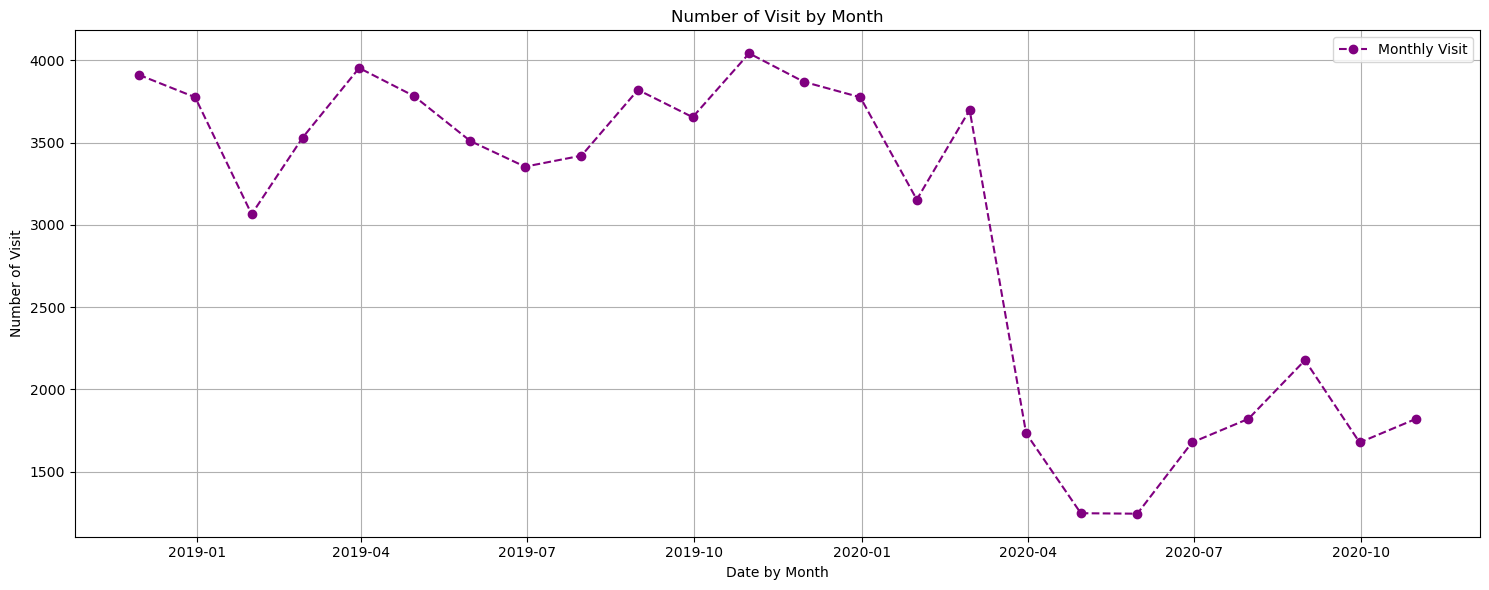

In [4]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

df_monthly_counts = df.resample("ME").size()

fig, ax = plt.subplots(figsize=(15,6))

ax.plot(
    df_monthly_counts,
    color="purple",
    linestyle="--",
    marker="o",
    label="Monthly Visit",
)
ax.set_title("Number of Visit by Month")
ax.set_xlabel("Date by Month")
ax.set_ylabel("Number of Visit")
ax.legend()
ax.grid(True)

date_format = mdates.DateFormatter("%Y-%m")
ax.xaxis.set_major_formatter(date_format)
# plt.setp(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()


現在可以很直接看到 2020 年 3 月的就診次數開始就明顯下降，所以根據這個觀察結果，可以定義 2020 年 3 月 1 日 00:00:00 的前後分別為「疫情前」與「疫情後」

而接下來就可以進入「就診模式」，即「都去哪一個門診看診」。這時候要分析 `科別` 這個欄位，要了解病患都去哪些科別，第一步通常是計算各個科別出現的總次數。比照前面模式，因為 `科別` 屬於名目尺度，因此可以直接將比較表製作成長條圖

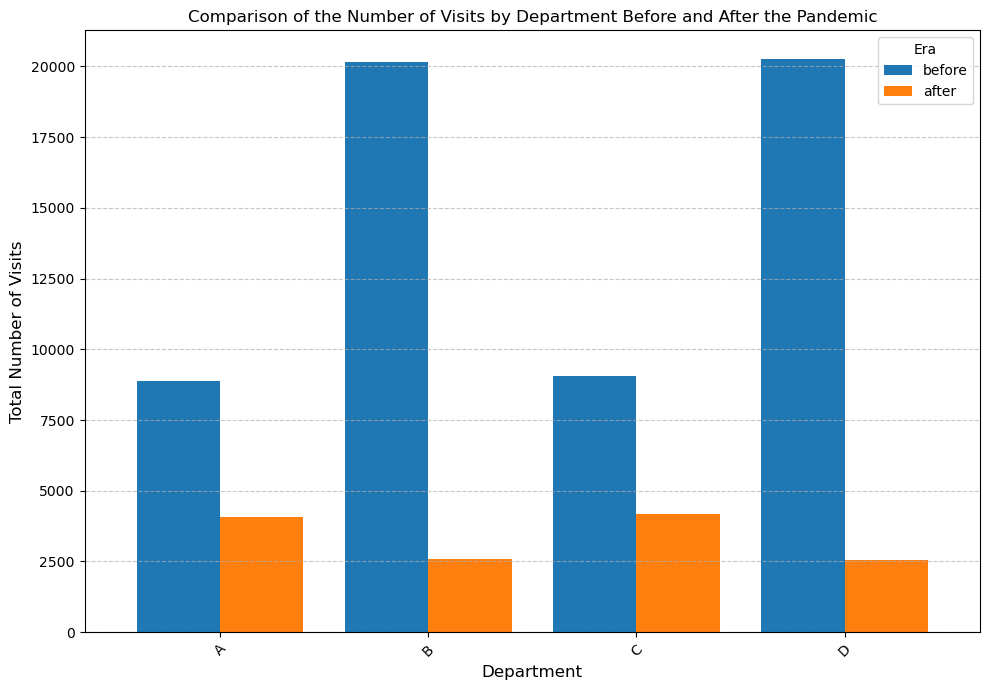

In [5]:
import numpy as np

split_date = pd.to_datetime("2020-03-01")
df["period"] = np.where(df.index < split_date, "before", "after")

df_department_summary = pd.crosstab(df["科別"], df["period"])
df_department_summary = df_department_summary[["before", "after"]]

ax = df_department_summary.plot(kind="bar", figsize=(10, 7), width=0.8)

ax.set_title(
    "Comparison of the Number of Visits by Department Before and After the Pandemic",
    fontsize=12,
)
ax.set_xlabel("Department", fontsize=12)
ax.set_ylabel("Total Number of Visits", fontsize=12)

ax.tick_params(axis="x", labelrotation=45)

ax.legend(title="Era")
ax.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()  # Improves layout, especially with rotated labels
plt.show()

到這邊，已經可以找出兩個 Overview 的 Insight，即

1. 時間趨勢上，就診人次在 2020 年 3 月出現了斷崖式下跌
2. 類別模式上，不同科別受疫情的衝擊程度不同，而科別 B 與 D 都有顯著下降

## Section 2. Feature Engineering using K-means Algorithm

做完一個很基本的資料探勘後，就可以進入特徵工程了。根據題目，要對病患的就診行為進行集群分析，那集群相關的事物就會涉及到 K-means 演算法

### Step A. K-means 演算法定義


> ##### Definition 1. The K-means Objective Function
> 
> 令 $\{X_1, X_2, \ldots, X_n\}$ 為 $n$ 個觀測資料點的集合，其中每一個 $X_i \in \mathbb{R}^p$；令 $K \in \mathbb{N}$ 為集群數量。則資料點的分割集合為集合 $\mathcal{C} = \{C_1, C_2, \ldots, C_K\}$ 使得
> 1. 滿足非空性： $C_k \neq \emptyset, \quad \forall \: k=1, \ldots, K$
> 2. 滿足互斥性： $C_k \cap C_j = \emptyset, \quad k \neq j$
> 3. 滿足完全覆蓋： $\cup_{k=1}^K C_k = X$
> 
對於每一個集群 $C_k$，定義質心（Centroid）為 $\mu_k \in \mathbb{R}^p$。而 K-means 演算法就是要找到一個目標函數 $J$，其分割 $\mathcal{C}^\ast$ 以及質心集合 $\{\mu_1^\ast , \ldots, \mu_K^\ast \}$，以將群內距離平方和做到最小化

$$
J(\mathcal{C}, \{\mu_k\}) = \sum_{k=1}^{K} \sum_{X_i \in C_k} \|X_i - \mu_k\|^2
$$

最佳化問題即為

$$
(\mathcal{C}^*, \{\mu_k^*\}) = \arg\min_{\mathcal{C}, \{\mu_k\}} \sum_{k=1}^{K} \sum_{X_i \in C_k} \|X_i - \mu_k\|^2
$$

> Source: [C. S. Chang, W. Liao, Y. S. Chen, and L. H. Liou, "A Mathematical Theory for Clustering in Metric Spaces," submitted to _arXiv_, Sep. 2015.](https://arxiv.org/abs/1509.07755v1)

---

具體來說，我們要分析的是「病患行為」，那在在 `df` 中，那資料點應該是「每一個病患」，即 $\{X_1, X_2, \ldots, X_n\}$。這裡要區分 

1. **觀測單位（Unit of Observation）** 是每一筆的「就診紀錄」
2. **分析單位（Unit of Analysis）** 也就是 K-means 演算法中的資料點 $X_i$，在這裡必須是「病患」

問題在於 $X_i$ 內的特徵 的選擇，因為根據目標函數，要計算距離 $\|X_i - \mu_k\|^2$，而「病人ID」或「病人姓名」則是這個向量的 index。因此接下來的目標，就是為每一個獨一無二的「病人ID」，建立一個能代表其行為的數值向量 $X_i$

一個可行的特徵包含

1. 疫情前後就診次數：定義總就診次數，分為疫情前 `before_visits` 與疫情後 `after_visits`
2. 就診科別向量：定義病患的就診偏好，針對四個科別定義就診次數 `visits_A`、`visits_B`、`visits_C`、與 `visits_D`
3. 疫情前後開銷：定義患者的醫療費，分為疫情前 `before_spending` 與疫情後 `after_spending`

接下來就要實做這些內容

### Step B. 建立 Features

#### B.1 建立疫情前後的資料子集

根據原先定義，以 2020 年 03 月 01 日進行疫情前後的拆分

In [6]:
df_before = df[df.index < split_date]
df_after = df[df.index >= split_date]

print("df_before\n", df_before)
print()
print("df_after\n", df_after)

df_before
                        病人ID    病人姓名 科別     金額  period
日期                                                   
2018-11-01 00:02:21  110034   若松 花子  B  19000  before
2018-11-01 00:03:10  112804  津田 美加子  D  20000  before
2018-11-01 00:06:19  110275  吉本 美加子  D  20000  before
2018-11-01 00:08:41  110169   坂本 直人  B  19000  before
2018-11-01 00:12:22  111504    青山 零  A  15000  before
...                     ...     ... ..    ...     ...
2020-02-29 23:49:54  111270  中津川 里佳  C  19000  before
2020-02-29 23:52:14  112251   田中 真綾  B  19000  before
2020-02-29 23:52:51  115804   井高 真綾  D  20000  before
2020-02-29 23:53:09  112928   石田 修平  D  20000  before
2020-02-29 23:55:28  110504   田辺 京助  B  19000  before

[58326 rows x 5 columns]

df_after
                        病人ID    病人姓名 科別    金額 period
日期                                                 
2020-03-01 00:07:10  113962   野村 和也  C  7000  after
2020-03-01 00:15:35  114926  小林 さゆり  C  7000  after
2020-03-01 00:43:34  110162   佐々木 幹  C  70

#### B.2 計算每一位病患在意情前後就診次數的花費

這裡就要把病患 ID 與金額聚合在一起，因此可以使用 `groupby()` 與 `agg()` 等操作執行。定義 `agg_before` 與 `agg_after` 分別為每一位病患在意情前後就診次數的花費，則

In [7]:
agg_before = df_before.groupby("病人ID")["金額"].agg(
    before_visits="size", before_spending="sum"
)
agg_after = df_after.groupby("病人ID")["金額"].agg(
    after_visits="size", after_spending="sum"
)

print("agg_before\n", agg_before)
print()
print("agg_after\n", agg_after)

agg_before
         before_visits  before_spending
病人ID                                  
109988             57          1106000
109989             39           750000
109990             36           686000
109991             42           808000
109992             38           733000
...               ...              ...
116499              4            80000
116500              6           107000
116501              2            38000
116504             10           184000
116508              2            35000

[5420 rows x 2 columns]

agg_after
         after_visits  after_spending
病人ID                                
109988            27          128000
109989            22          123000
109990            34          190000
109991            28          166000
109992            61          331000
...              ...             ...
116495             1            8000
116496             1            7000
116498             1            8000
116500             1            7000


#### B.3：建立每位病患就診科別狀況

因為我們不可能人工審閱 71722 筆資料，更不用說逐一檢查就診科別分佈。因此假定每一位病患都可能在四個科別都有就診，定義四個科別分別對應 `visit_A` 到 `visit_D`，操作如下

In [8]:
department_vectors = pd.crosstab(
    df["病人ID"],
    df["科別"],
).rename(
    columns={
        "A": "visits_A",
        "B": "visits_B",
        "C": "visits_C",
        "D": "visits_D",
    }
)

print(department_vectors)

科別      visits_A  visits_B  visits_C  visits_D
病人ID                                          
109988        18        26        11        29
109989        13        11        11        26
109990        16        18        16        20
109991        11        26        20        13
109992        29        21        32        17
...          ...       ...       ...       ...
116499         0         0         0         4
116500         2         1         3         1
116501         0         0         2         0
116504         2         3         1         5
116508         1         0         0         1

[5486 rows x 4 columns]


#### B.4：將所有特徵合併成一個 `DataFrame`

在這邊會使用 `concat` 而非 `merge`，因為這些資料的索引都是 `病人ID`，在合併後可能會出現空缺值，因此直接補 0

In [9]:
df_patient = pd.concat([agg_before, agg_after, department_vectors], axis=1).fillna(0)
print(df_patient)

        before_visits  before_spending  after_visits  after_spending  \
病人ID                                                                   
109988         57.000      1106000.000        27.000      128000.000   
109989         39.000       750000.000        22.000      123000.000   
109990         36.000       686000.000        34.000      190000.000   
109991         42.000       808000.000        28.000      166000.000   
109992         38.000       733000.000        61.000      331000.000   
...               ...              ...           ...             ...   
116198          0.000            0.000         1.000        8000.000   
116295          0.000            0.000         1.000        8000.000   
116343          0.000            0.000         1.000        7000.000   
116422          0.000            0.000         1.000        3000.000   
116491          0.000            0.000         1.000        3000.000   

        visits_A  visits_B  visits_C  visits_D  
病人ID          

#### B.5. 回顧 Definition 1

剛剛建立的 `df_patient` 這個 `DataFrame`，就是 K-means 演算法定義中的資料點集合 $\{X_1, X_2, \ldots, X_n\}$ 的具體內容。其中

1. $n$ 是病患的總人數，也就是 df_patient 的總列數，即 5486
2. $p$ 是我們為每位病患建立的特徵數量，也就是總欄位數 8 
3. $X_i$ 就是 `df_patient` 中的第 $i$ 列，每一列都是一個 8 維的向量。例如第一位病患 `109988` 的特徵向量就是 $[57.0, 1106000.0, 27.0, 128000.0, 18, 26, 11, 29]$

### Step C. 特徵標準化

在我們將這個特徵矩陣餵給 K-means 演算法之前，要先做標準化（Standardization）。回顧 Objective Function $J$ 為

$$
J(\mathcal{C}, \{\mu_k\}) = \sum_{k=1}^{K} \sum_{X_i \in C_k} \|X_i - \mu_k\|^2
$$

這公式重點在歐幾里得距離的平方 $\|X_i - \mu_k\|^2$，對向量 $X_i$ 中的每一個維度進行操作。但可以觀察到第一位病患 `109988` 的特徵向量：

$$
X_1 = [57.0,\: \textbf{1106000.0}\:, 27.0\:, \textbf{128000.0}\:, 18\:, 26\:, 11\:, 29]
$$

這其中的 `before_spending = 1,106,000` 的數值尺度，遠遠大於 `visits_A = 18` 或 `after_visits = 27`。也就是說，這個數字在進行距離計算時，`before_spending` 這個特徵的影響力會顯著對整個結果造成影響。演算法會直接把這些病患聚集在一起，其他特徵就忽略掉了

統計學中的 Z-score 標準化就可以處理這些可能出現極端值的狀況，主要是將每一個特徵 $f_j$ 都轉換成一個新的特徵 $f'_j$，使其平均值為 0，標準差為 1。對於特徵向量 $X_i$ 中的第 $j$ 個特徵 $x_{ij}$，其標準化後的特徵 $x'_{ij}$ 計算公式如下：

$$
x'_{ij} = \frac{x_{ij} - \bar{f_j}}{s_j}
$$

其中 $\bar{f_j}$ 是第 $j$ 個特徵在所有病患中的樣本平均值（sample mean）；而 $s_j$ 是第 $j$ 個特徵在所有病患中的樣本標準差（sample standard deviation）

> Source：[S. G. K. Patro and K. K. Sahu, "Normalization: A Preprocessing Stage," submitted to _arXiv_, Mar. 2015.](https://arxiv.org/abs/1503.06462)

在 `sklearn` 中，[`StandardScaler`](https://`sklearn`.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) 這個工具就可以用來完成這件事情，而文件中的 `fit_transform()` 就是以下步驟的整合

1. `fit()` 計算平均值與標準差
2. `transform()` 執行資料標準化

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_patient_scaled = scaler.fit_transform(df_patient)

因為轉換後的結果是一個 numpy array，因此可以將其變回 DataFrame 以便觀察

In [11]:
df_patient_scaled = pd.DataFrame(
    df_patient_scaled, index=df_patient.index, columns=df_patient.columns
)
print(df_patient_scaled)

        before_visits  before_spending  after_visits  after_spending  \
病人ID                                                                   
109988          3.691            3.759         3.580           2.977   
109989          2.258            2.285         2.851           2.845   
109990          2.019            2.019         4.600           4.610   
109991          2.497            2.525         3.725           3.978   
109992          2.179            2.214         8.535           8.324   
...               ...              ...           ...             ...   
116198         -0.846           -0.821        -0.210          -0.184   
116295         -0.846           -0.821        -0.210          -0.184   
116343         -0.846           -0.821        -0.210          -0.210   
116422         -0.846           -0.821        -0.210          -0.315   
116491         -0.846           -0.821        -0.210          -0.315   

        visits_A  visits_B  visits_C  visits_D  
病人ID          

In [56]:
# Some other parameters
print("Standardized Data\n", df_patient_scaled.head())

Standardized Data
         before_visits  before_spending  after_visits  after_spending  \
病人ID                                                                   
109988          3.691            3.759         3.580           2.977   
109989          2.258            2.285         2.851           2.845   
109990          2.019            2.019         4.600           4.610   
109991          2.497            2.525         3.725           3.978   
109992          2.179            2.214         8.535           8.324   

        visits_A  visits_B  visits_C  visits_D  
病人ID                                            
109988     4.068     3.245     2.204     3.694  
109989     2.767     1.018     2.204     3.247  
109990     3.548     2.057     3.487     2.355  
109991     2.247     3.245     4.514     1.315  
109992     6.929     2.502     7.593     1.909  


注意標準化公式前方的內文：

> _將每一個特徵 $f_j$ 都轉換成一個新的特徵 $f'_j$，使其平均值為 0，標準差為 1_

可以把數值用以下方式檢查是否正確

In [58]:
print("Mean of X_i after standardization\n", df_patient_scaled.mean())
print()
print("Std of X_i after standardization\n", df_patient_scaled.std())

Mean of X_i after standardization
 before_visits      0.000
before_spending    0.000
after_visits       0.000
after_spending    -0.000
visits_A           0.000
visits_B          -0.000
visits_C           0.000
visits_D           0.000
dtype: float64

Std of X_i after standardization
 before_visits     1.000
before_spending   1.000
after_visits      1.000
after_spending    1.000
visits_A          1.000
visits_B          1.000
visits_C          1.000
visits_D          1.000
dtype: float64


這樣你就可以看到一個新的 `df_patient_scaled`，且所有欄位的尺度都被縮放到同一個基準上，所以就可以進入 K-means 演算法了

### Step D. 選定 K 值

現在資料集已經被轉換成 $n \times p = 5486 \times 8$ 的標準化矩陣了，可以直接塞入 k-means 演算法。但回顧前述內容：

> 令 $K \in \mathbb{N}$ 為集群數量。則資料點的分割集合為集合 $\mathcal{C} = \{C_1, C_2, \ldots, C_K\}$ 使得
> 1. 滿足非空性： $C_k \neq \emptyset, \quad \forall \: k=1, \ldots, K$
> 2. 滿足互斥性： $C_k \cap C_j = \emptyset, \quad k \neq j$
> 3. 滿足完全覆蓋： $\cup_{k=1}^K C_k = X$

因此在執行演算法之前，就必須回答一個核心問題：「要將病患分成幾群？」也就是說現在就要選定 K 值。但 K 值沒做好就可能會炸掉你的專案，所以可以用一些方式來輔助我們做出決定。經驗法則有時候有用，但也不是萬能。有時候跑一個數億規模等級的資料運算，用經驗瞎猜一次就可能燒掉好幾千美金的運算成本（在 AWS 或 GCP 等上面的運算資源很昂貴的），你的 Senior Dev 上司就不會讓這種事情發生

那如何選？原則上會透過 **手肘法（The Elbow Method）**

#### D.1 The Elbow Method 原理

> Ref：[Elbow Method for optimal value of k in KMeans](https://www.geeksforgeeks.org/machine-learning/elbow-method-for-optimal-value-of-k-in-kmeans/)

若選定一個 $K$ 值，就會計算 **群內誤差平方和（Within-Cluster Sum of Squares, WCSS）** 的變化，也就是 K-means 目標函數 $J$ 在最佳化之後的值。避免符號上混淆，定義  $J_K^*$，代表在給定 K 值下的最小 WCSS：

$$
J_K^* = \min_{\mathcal{C}, \{\mu_k\}} \sum_{k=1}^{K} \sum_{X_i \in C_k} \|X_i - \mu_k\|^2
$$

直觀想法上：
1. 當 $K=1$，所有資料點都在同一群，這時 WCSS 會非常大。
2. 隨 $K$ 值增加，每一群會變越來越緊湊，因此 WCSS 會迅速下降
3. 但當 $K$ 值增加到某一個點之後，再增加 $K$ 值造成的 WCSS 降幅會趨於平緩。要找的就是這個轉折點，一般就是 $K$ 值的「不錯解」。而網路上有人說就像是手臂的「手肘」，這就見仁見智

前述文章中有提到 **慣性 Inertia** 與 **失真 Distortion**，分別是
1. **Inertia** 是衡量所有群組內部資料點的分散程度、或緊湊度的和。假定一個集群的點都非常靠近集群的中心點（質心） $\mu_k$，則這個總和會很小，代表此群組的慣性小、密度高、很緊湊
2. **Distortion** 是衡量用 $K$ 個中心點代表整個資料集所造成的總資訊損失。對於資料點 $X_i$，與代表向量 $\mu_k$ 之間的平方距離 $\|X_i - \mu_k\|^2$ 即為其 distortion，而 K-means 的目標函數就是所有資料點 distortion 的總和。因此，將 $J$ 最小化的過程等同於尋找 $K$ 個最佳中心點及其對應的分割方式，使得用這些中心點近似整個資料集所產生的總 distortion 最小。如果從這敘述中，你會發限這就是
   $$
   \text{WCSS} = \text{Distortion} = J_K^* = \min_{\mathcal{C}, \{\mu_k\}} \underbrace{\sum_{k=1}^{K} \sum_{X_i \in C_k} \|X_i - \mu_k\|^2}_{\text{Inertia as well as Distortion}}
   $$
3. 為何在 K-means 都只說「最佳化」、「近似」，而非「最佳解」？原因是 k-means 的「最佳解」本身就是一個 NP-hard 問題。換句話說，標準 K-means 演算法通常使用迭代最佳化方法將數值收斂到一個**局部極小值（Local Minimum）**，而非保證找到**全局最優解（Global Minimum）**。詳細可以參考 [M. F. Balcan, A. Blum, and A. Gupta, "Clustering under Approximation Stability," _J. ACM_, vol. 60, no. 2, p. 8, Apr. 2013.](https://www.researchgate.net/publication/262331921_Clustering_under_Approximation_Stability)

#### D.2 找合理 $K$ 值

這邊就可以用 `sklearn` 計算 $K$ 從 1 到 10 的 WCSS 值，並將結果繪製成圖表

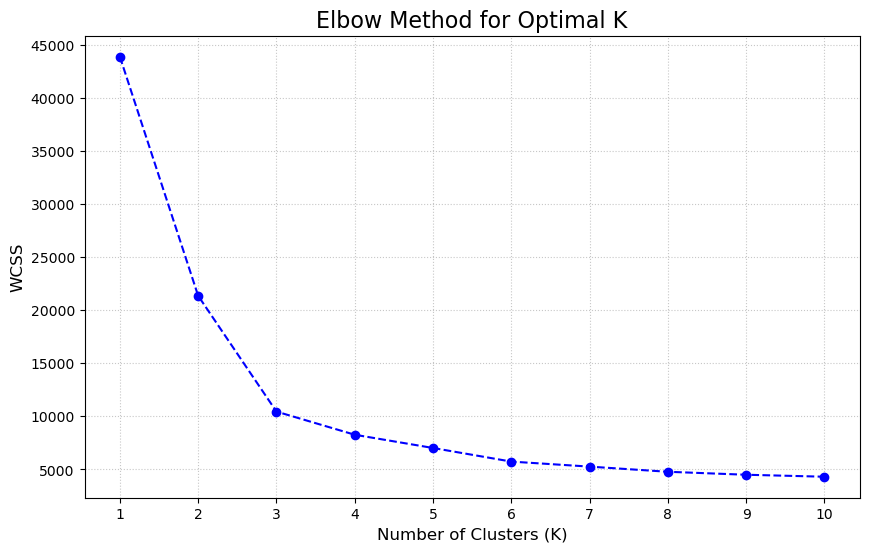

In [14]:
from sklearn.cluster import KMeans

X = df_patient_scaled # Previously normalized data
wcss = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init="auto", random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(k_range, wcss, marker="o", linestyle="--", color="blue", label="WCSS")

ax.set_title("Elbow Method for Optimal K", fontsize=16)
ax.set_xlabel("Number of Clusters (K)", fontsize=12)
ax.set_ylabel("WCSS", fontsize=12)
ax.set_xticks(k_range)
ax.grid(True, linestyle=":", alpha=0.7)
plt.show()

在上圖中 $K=3$ 處已經形成了一個最明顯的「手肘」；而從 $K=3$ 到 $K=4$ 之間，WCSS 降幅已經區緩；到 $K=5$ 之後可以發現效益開始遞減

因此選擇 $K=3$ 或 $K=4$ 都是合理的，但在實務上當手肘不明顯或存在多個可能的 $K$ 值時，可以都嘗試看看，然後選擇一個在業務上最有解釋力的結果。畢竟你做這些的目的，就是提供 insight 出來，所以要思考選定集群數要如何跟分析的業務有所關聯

以下內容會先選擇 $K=4$ 做分析

#### D.3 執行 K-means (K=4) 並指派群組

現在才會進入 KMeans 演算法實做，令 `K = 4` 對標準化後的病患資料 `df_patient_scaled` 進行分群，並且取得每一位病患的群組標籤

> Ref：[`sklearn.cluster.KMeans`](https://`sklearn`.org/stable/modules/generated/sklearn.cluster.KMeans.html)

In [15]:
K = 4
kmeans = KMeans(n_clusters=K, n_init="auto", random_state=42)
kmeans.fit(df_patient_scaled)
cluster_labels = kmeans.labels_

因為解讀群組特性需要用原始數值操作，所以要將群組標籤加回到 **沒有標準化的**原始 `df_patient`  中

In [16]:
df_patient["cluster"] = cluster_labels
print(df_patient.head())

        before_visits  before_spending  after_visits  after_spending  \
病人ID                                                                   
109988         57.000      1106000.000        27.000      128000.000   
109989         39.000       750000.000        22.000      123000.000   
109990         36.000       686000.000        34.000      190000.000   
109991         42.000       808000.000        28.000      166000.000   
109992         38.000       733000.000        61.000      331000.000   

        visits_A  visits_B  visits_C  visits_D  cluster  
病人ID                                                     
109988        18        26        11        29        2  
109989        13        11        11        26        2  
109990        16        18        16        20        2  
109991        11        26        20        13        2  
109992        29        21        32        17        2  


確認 `cluster` 欄位加入後，就可以統計群集人數了

In [17]:
print(df_patient["cluster"].value_counts().sort_index())

cluster
0    3267
1     497
2     176
3    1546
Name: count, dtype: int64


現在有一個重點，就是這四組人各自代表了什麼樣的行為模式？也就是為什麼演算法會把這 3267 人分在同一組，而另外 176 人又為何分在一組？

如果要回答這個問題，那就要先計算出每個群組的 **平均輪廓**。也就是說要看群組 `0` 患者的 平均的疫情前後就診次數、花費、以及各科別就診次數是多少？還有其他群組呢？

那這時就可以根據 `cluster` 欄位對 `df_patient` 操作 `groupby()` 進行分組，然後計算每個欄位的平均值

In [18]:
df_patient_clustered = df_patient.groupby("cluster").mean()

print("Clustered Summary\n", df_patient_clustered)

Clustered Summary
          before_visits  before_spending  after_visits  after_spending  \
cluster                                                                 
0                3.755        68320.784         0.557        3602.694   
1               39.121       752859.155         4.702       34748.491   
2               40.909       777982.955        36.852      200778.409   
3               12.560       228902.329         1.781       11503.881   

         visits_A  visits_B  visits_C  visits_D  
cluster                                          
0           1.057     1.090     1.034     1.130  
1           1.545    20.404     1.575    20.298  
2          19.705    19.051    19.773    19.233  
3           3.405     3.666     3.614     3.655  


- **Cluster 0（3,267 人）：低頻就診、受到疫情衝擊**

   這是人數最多的群體，屬於**低度使用者**，在疫情前就診次數與花費最低，疫情後更趨近於零。就診科別分布平均，無科別的偏好。這類人可能比較多是因為偶爾感冒而就診的人群。遇到疫情後可能也先選擇延後或取消非必要的活動待在家裡，所以才沒有救診需求

- **Cluster 1（497 人）：對 B/D 科忠誠、受到疫情衝擊**

   疫情前有**極高**的就診次數與花費，但就診行為**高度集中**於 B 科與 D 科。而在疫情爆發後，就診次數直接大幅下降。在醫療實務中，這些有可能是 B/D 科的**慢性病或長期追蹤**的患者，很可能是醫院在疫情前的忠實客戶，但某些醫療需求屬於「可延後」類型，因此疫情期間大幅減少回診。同時可以觀察到這跟在 _Section 1. Step C._ 中在 EDA 階段發現的 B/D 科就診數大幅下降的模式很接近

- **Cluster 2（176 人）：高頻就診、剛性需求群**

   這類人數最少，但屬於**價值最高**的群體，因為在疫情前的就診次數與花費為所有群體中最多的，且平均分散於四個科別。然後這些人在疫情後的就診次數也**僅微幅下降**，也就是說他們有明顯的**醫療剛性需求**。而這些群體可能是有重大傷病、或其他緊急醫療需求的主要患者，這些人的醫療行為**不會受到**疫情影響，看消費金額也可以說是是醫院相對穩定的收入來源

- **Cluster 3（1,546 人）：中頻就診、疫情衝擊群**

   這類人群的行為模式介於集群 0 和集群 1 之間，屬於**中度使用者**。就診次數與花費高於集群 0，但遠低於集群 1 和 2。疫情後同樣大幅減少就診

#### D.4 進行視覺化

在以上從資料解讀出各群組的意義之後，就來到 K-means 的最後一步，也就是將 cluster 結果視覺化。因為資料有 8 個維度（特徵），這沒有辦法直接在 2D 平面上畫出來，為了解決這個問題，我們需要使用一種稱為主成分分析（Principal Component Analysis, PCA）的降維技術

PCA 的目標是在不失太多資訊的前提下，找到一個維度較低的 **新座標系統** 來重新表達給定的資料。對於一個有 $p$ 個原始特徵的資料集，PCA 最多可以產生 $p$ 個主成分，每一個主成分 $PC_j$ 都是原始特徵的線性組合，且彼此之間是正交的（orthogonal）

$$
PC_j = w_{j1}f_1 + w_{j2}f_2 + \ldots + w_{jp}f_p = \mathbf{w}_j^T \mathbf{f}
$$

在非視覺化的應用中，通常會選擇前 $k$ 個主成分，使得這 $k$ 個主成分解釋的變異量總和達到一個閾值（例如 95\%），以做為後續模型的輸入，即可在保留大部分資訊的同時，降低模型的複雜度。但就作業要做視覺化說，將原始的 8 個特徵，濃縮成 2 個最能代表資料變異性的 主成分 $PC_1$ 和 $PC_2$，然後就能靠用這兩個主成分作為 $X$ 軸和 $Y$ 軸畫出散佈圖即可

這裡會需要使用到 [`sklearn.decomposition`](https://`sklearn`.org/stable/api/sklearn.decomposition.html) 套件

In [19]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)

對標準化後的資料進行 PCA 降維，隨後將降維後的結果變成 `DataFrame`，並加上 cluster 標籤

In [20]:
df_patient_pca = pca.fit_transform(df_patient_scaled)

df_pca = pd.DataFrame(
    data=df_patient_pca, columns=["PC1", "PC2"], index=df_patient.index
)

df_pca["cluster"] = df_patient["cluster"]

接下來就可以畫出 scatter plot 了

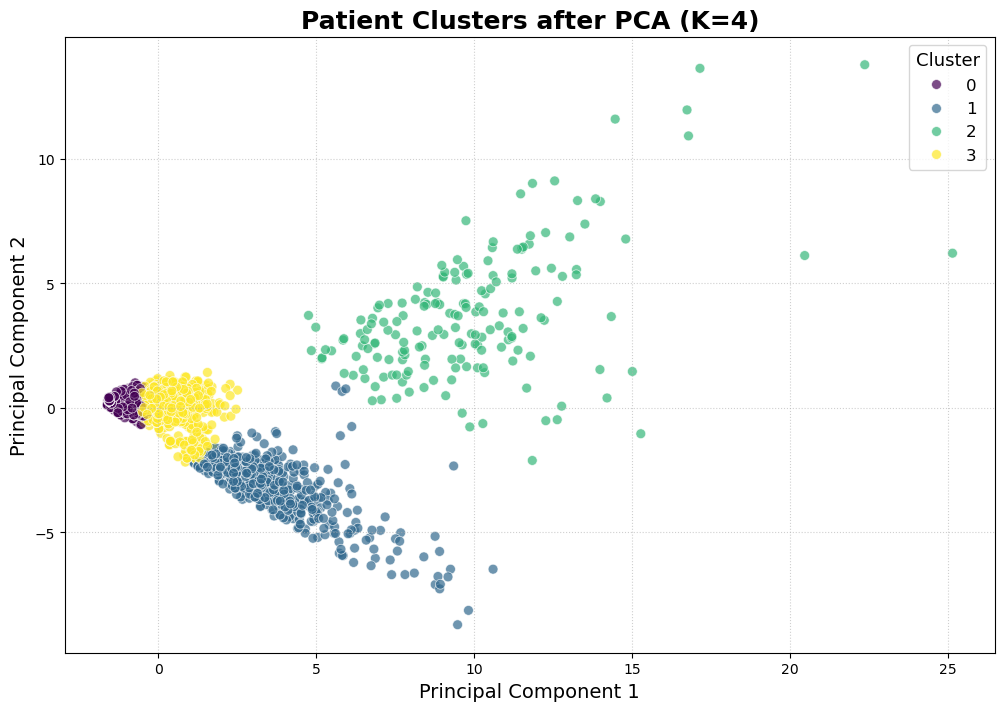

In [21]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.scatterplot(
    x="PC1",
    y="PC2",
    hue="cluster",
    data=df_pca,
    palette="viridis", 
    s=50,
    alpha=0.7,
)

ax.set_title(f"Patient Clusters after PCA (K={K})", fontsize=18, fontweight="bold")
ax.set_xlabel("Principal Component 1", fontsize=14)
ax.set_ylabel("Principal Component 2", fontsize=14)

ax.legend(title="Cluster", title_fontsize="13", fontsize="12")
ax.grid(True, linestyle=":", alpha=0.6)

plt.show()

至此 K-means 演算法操作算是基本完成了

#### D.5 主成份負荷矩陣

> 這不在課程範圍內，但可以嘗試了解一下「如何解釋 PC1 和 PC2 的意義」

在數學上，每一個主成分 `PC` 都是原始 8 個標準化特徵的一個線性組合，在上例中可以寫成

$$
PC_1 = w_{1,1} \cdot f_1 + w_{1,2} \cdot f_2 + \ldots + w_{1,8} \cdot f_8
$$
$$
PC_2 = w_{2,1} \cdot f_1 + w_{2,2} \cdot f_2 + \ldots + w_{2,8} \cdot f_8
$$

這裡的 $f_j$ 是我們的第 $j$ 個標準化後的特徵，例如 `before_visits_scaled`；而係數 $w_{ij}$ 稱為負荷（Loading），也就是第 $j$ 個原始特徵對第 $i$ 個主成分的「貢獻度」或「重要性」。一個絕對值很大的 loading 代表該原始特徵是形成該主成分的主要因素；而 loading 的正負號則是代表這個特徵與主成分是正相關還是負相關

在 `sklearn` 中，這些 loading 值就存放在前面已經訓練好的 `pca` 物件的 `.components_` 屬性裡面，其中 `.components_` 的維度是 (`n_components`, `n_features`)，也就是 $(2, 8)$。因此可以把 loading 取出做成表格來觀察，來看看 PC1 和 PC2 究竟是哪些特徵在主導的

然而 PCA 本身可以產生最多與原始特徵數量相同的主成分，也就是到 `PC7`，因此以下會一次輸出全部成份。這時有一點需要注意，就是 PCA 和 K-means 一樣是基於 變異數 或 共變異數 進行分析的，對任何特徵的尺度會相當敏感，所以必須使用標準化後的 `df_patient_scaled` 來進行 PCA，才能確保每個特徵都有公平的權重。那以下算是總結 PCA 在做完 Z-score 標準化之後，你分區塊所會執行的步驟

In [22]:
X_scaled = df_patient_scaled.drop("cluster", axis=1, errors="ignore")

df_pca_full = PCA(n_components=None)
df_pca_full.fit(X_scaled)

explained_variance_ratio = df_pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

print("各主成分所解釋的變異量比例")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"  PC{i + 1}: {ratio:.4f} ，累積到 {cumulative_variance[i]:.4f}")

各主成分所解釋的變異量比例
  PC1: 0.7214 ，累積到 0.7214
  PC2: 0.2209 ，累積到 0.9423
  PC3: 0.0245 ，累積到 0.9668
  PC4: 0.0212 ，累積到 0.9880
  PC5: 0.0115 ，累積到 0.9996
  PC6: 0.0004 ，累積到 1.0000
  PC7: 0.0000 ，累積到 1.0000
  PC8: 0.0000 ，累積到 1.0000


因為製作矩陣需要有 row 跟 column，在「視覺」上可以選 `loading` 作為 row，那就要進行矩陣轉置

In [23]:
loadings = df_pca_full.components_
df_loadings = pd.DataFrame(
    loadings.T,
    columns=[f"PC{i + 1}" for i in range(len(X_scaled.columns))],
    index=X_scaled.columns,
)

print("Principal Component Loadings\n", df_loadings)

Principal Component Loadings
                   PC1    PC2    PC3    PC4    PC5    PC6    PC7    PC8
before_visits   0.374 -0.313 -0.305  0.027  0.003  0.209 -0.374  0.696
before_spending 0.373 -0.321 -0.255  0.051 -0.014 -0.044  0.829 -0.000
after_visits    0.363  0.334  0.440 -0.081  0.006 -0.637  0.072  0.380
after_spending  0.374  0.286  0.496  0.019 -0.005  0.718  0.131 -0.000
visits_A        0.316  0.415 -0.466 -0.677  0.008  0.025 -0.082 -0.213
visits_B        0.352 -0.361  0.172 -0.024  0.712 -0.109 -0.238 -0.373
visits_C        0.317  0.417 -0.352  0.728 -0.008 -0.081 -0.138 -0.216
visits_D        0.353 -0.360  0.177 -0.042 -0.702 -0.119 -0.260 -0.373


將以上內容繪製成 heat map

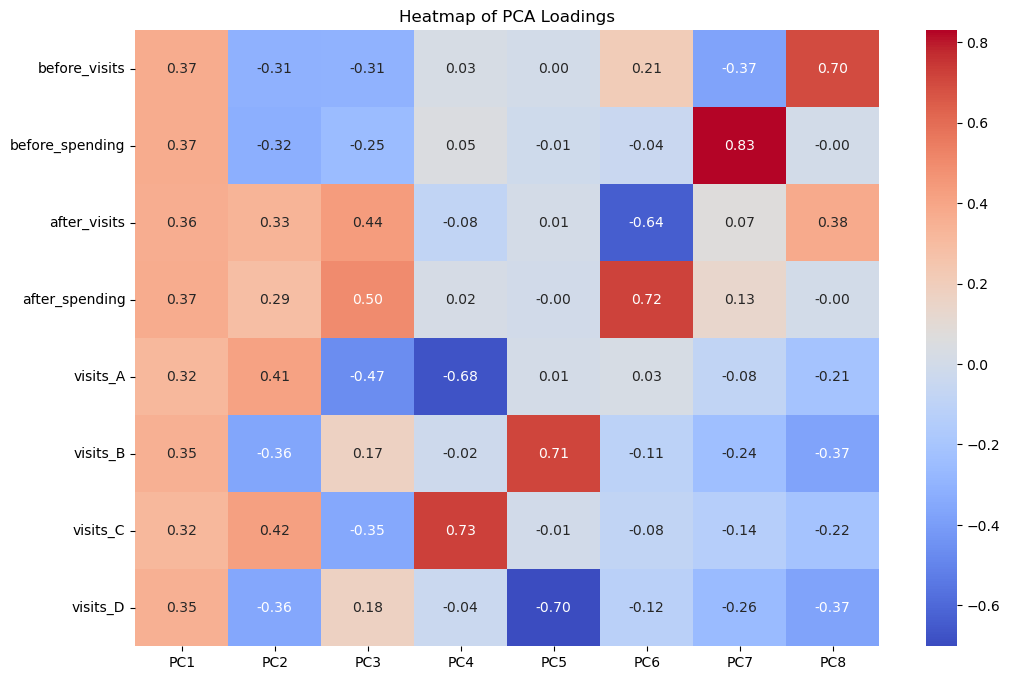

In [24]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(df_loadings, annot=True, cmap="coolwarm", fmt=".2f")
ax.set_title("Heatmap of PCA Loadings")
plt.show()

這時可以注意到

> 為何 `PC1` 與 `PC2` 顏色看起來很弱？難道這沒有排序嗎？

若追溯到 PCA 的基礎定理 **奇異值分解（SVD）**，會發現定理中要求矩陣的基底必須為 **標準有序基底（standard ordered bases）**，所以數學上本身就保證 PC 是有經過排序的，而且順序絕對是由大到小排序。回去觀察「各主成分所解釋的變異量比例」，可以發現 PCA 保證 `PC1` 永遠是捕捉最多資訊的「最強」主成分。問出前述問題的誤解之處，在於 **一個主成分的「強度」即所解釋的變異量，與其跟單一原始特徵的「關聯強度」即負荷大小，是兩件不同的事情**

1. PCA 降維的有效性在於「變異量」

   `PC1` 和 `PC2` 兩者相加，已經解釋了資料中 94.23% 的總變異量，代表我們將原始的 8 維特徵空間壓縮到 2 維平面上時，只損失了不到 6% 的資訊

2. `PC1` 和 `PC2` 的 insight 在於負荷矩陣

   - 可以注意到 `PC1` 顏色很相當，其 `loading` 值都在 0.3 到 0.4 之間，這代表所有 8 個特徵都與 `PC1` 有高度正相關。換句話說，當一個病患的 `before_visits`, `before_spending`, `after_visits`, `visits_A`, `visits_B`... 等數值越高時，他在 `PC1` 軸上的分數也就越高。因此 `PC1` 可以被理解為一個衡量「病患總體醫療參與度」或「活躍度」的綜合指標，在 X 軸從左到右看，就代表病患從低活躍度到高活躍度的光譜
   - `PC2` 這裡就有正負相關差異了
      
      - 正相關（Positive Loadings）： `visits_A` (0.415), `visits_C` (0.417), `after_visits` (0.334), `after_spending` (0.286)
      - 負相關（Negative Loadings）： `visits_B` (-0.361), `visits_D` (-0.360), `before_visits` (-0.313), `before_spending` (-0.321)

      可以觀察到 `PC2` 比較出的不只是疫情前後，還包含對科別的偏好
      
      - 一個病患的 `PC2` 分數越高，代表該病患越傾向於在 **疫情後** 到 **A 科和 C 科** 就診
      - 一個病患的 `PC2` 分數越低（負得越多），代表該病患越傾向於在 **疫情前** 到 **B 科和 B 科** 就診
      
      這個發現與前面在 EDA 階段的得到的結論非常接近，可以注意到當時就有初步看出 B 科和 D 科的就診人次在疫情後出現明顯下跌，而 A 科和 C 科相對穩定。因此 `PC2` 就是在經過一系列嚴謹的數學操作下，印證當時的假設是「不拒絕」的

## Section 3. Random Forest Classification

Random Forest 中的每一棵「樹」都是一個決策樹（Decision Tree），決策樹又有包含分類樹（Classification Tree）還有迴歸樹 （Regression Tree）。若忘記決策樹的話，建議最好要回顧一下你的修過的資料結構與演算法課程。簡而言之，決策樹是一個完全二元樹，主要在一些排序演算法（例如 insertion sort 或 merge sort 等）在給定輸入大小運作時，可以進行元素之間的數值比較

### Step A. RF 原理

> 有關 `sklearn` 操作決策樹的所使用到的 Tree Algorithm，可以參考 sklearn 官方文件在 [1.10.6. Tree algorithms: ID3, C4.5, C5.0 and CART](https://`sklearn`.org/stable/modules/tree.html#tree-algorithms-id3-c4-5-c5-0-and-cart) 中的說明

在機器學習中，決策樹就是對特徵空間進行遞迴二元分割以做到將資料分層，目標是讓分割後的子集（稱為節點）的 **不純度（impurity）** 盡可能降低。不純度是分類問題中，用來衡量是否完整分類的程度。

而要輸出的目標變數 $Y$ 又可以分為 離散型 與 連續型 資料，在決策樹中分別定義到「分類樹」 與 「迴歸樹」，這與其輸入特徵 $\mathbf{X}$ 的類型無關。在這次作業中，目標變數是 cluster 標籤（0 到 3），屬於一種離散的分類問題，所以是在分類樹的框架下操作。那而一般會用到的就是 Gini 不純度（Gini impurity），定義如下：



> ##### Definition of Gini Impurity
>
> 即對於一個節點 $m$ 而言，其 Gini Impurity 的數學定義是：
>
> $$G(m) = \sum_{k=1}^{K} p_{mk}(1 - p_{mk}) = 1 - \sum_{k=1}^{K} p_{mk}^2$$
>
> 其中，$K$ 是分類的總數（例如前述案例中的 cluster 是用 $K=4$）；而 $p_{mk}$ 是節點 $m$ 中，屬於類別 $k$ 的樣本所佔的比例（機率）


如果樣本均勻分佈在所有類別中，那 Gini Impurity 的值會達到最大


另一個不純度的定義是 Entropy（熵），衡量的是一個系統的「混亂」或「不確定性」程度。定義如下：


> ##### Definition of Entropy
>
> 給定一個節點 $m$，Entropy 的數學定義是：
>
>$$H(m) = - \sum_{k=1}^{K} p_{mk} \log_2(p_{mk})$$
>
> 如果一個節點只包含自己的類別，其 $H = 0$；一個完全混亂的節點（各類別樣本數相等），其 $H$ 最大


決策樹的建立基於資訊增益（Information Gain, IG）而非 Entropy。在選擇分割方式時，目標是使分割後的資訊不確定性有最多的下降

資訊增益 IG = （父節點的 Entropy） 減去 （所有子節點 Entropy 的加權平均）

$$
\text{IG}(D, a) = H(D) - \sum_{v \in \text{Values}(a)} \frac{|D_v|}{|D|} H(D_v)
$$

在絕大多數情況下，Gini Impurity 和 Entropy 作為分割標準，會做出整體結構非常相似的決策樹。Gini 會傾向將最大的類別分離出來，而 Entropy 則是專注在找出純度更高的子節點。但在實務上，兩者的性能差異非常小，因此選擇哪一個通常不是影響模型好壞的關鍵

如果從演算法的角度來看，`sklearn` 會傾向於使用 Gini 計算不純度。因為 Gini 的計算是一個基本的浮點數乘法運算，而 Entropy 是使用對數在 CPU 指令層級，執行一次浮點數乘法通常只需幾個時脈週期。因此相比之下，對數函數並沒有直接的硬體指令，必須透過查表、泰勒級數展開或數值逼近方法來實現，通常就需要數十甚至上百個時脈週期來完成一次運算操作。所以再回來看專案中所建立決策樹，且尤其是隨機森林中的數百棵樹，不純度計算會執行數千萬到數億次。在這種規模下，即使單次計算的效能差異極小，累積起來也會有明顯差異

而 Aurélien Géron (2022) 提到二分類問題中，兩者在相同資料下隨機率變化的曲線狀非常接近，因此在絕大多數情況下，它們會選擇相同的分割點。詳細可以參考 [A. Géron, _Hands-On Machine Learning with scikit-learn, Keras, and TensorFlow_, 3rd ed. Sebastopol, CA, USA: O’Reilly Media, 2022.](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/) 中在 Decision Tree 的章節說明

單一的決策樹非常容易過擬合（Overfitting），也就是會一直生出子節點，直到能完美區分訓練資料為止。簡單來說就是矯枉過正，導致面對新資料時，難以把沒看過的資料做正確分類。如果用統計學角度來看，這是屬於 **高變異性（High Variance）** 資料，模型對訓練資料極度敏感。對這種資料只要稍微改變一下訓練資料（例如更換、新增或移除一些資料點），你可能會看不出來這跟前一個模型有關係，也進而讓其預測結果截然不同。因此這種類型的模型，我們就會稱其為「不穩定」或「善變」的

> 一個學生用死記硬背的方式，把教科書裡的每一個例題、每一個數字、甚至標點符號都倒背如流。如果你拿教科書（原先訓練資料集）裡的原問題去考他，他基本上就可以拿滿分，不會出錯；但他只要到考學測時，換一種問法來考觀念、或是出一個複合題型，他考試可能就炸掉了
>
> 如果當時給他不同本教科書，那他背誦的內容將會完全不同，這可能會讓他的「知識體系」也出現改變，這就是對訓練資料的「高度敏感」

為了解決決策樹高變異性的問題，Random Forest 採用的是 **自助法聚合（Bagging）** 這種集成學習（Ensemble Learning）的方法來解決

#### 自助法聚合（Bagging）

假設我們的訓練資料集為 $\mathcal{D}$，共有 $n$ 個樣本。現在開始從 $\mathcal{D}$ 中進行放回抽樣（sampling with replacement）$n$ 次，得到一個新的資料集 $\mathcal{D}^*$。過程重複 $B$ 次，以產生 $B$ 個不同的自助樣本（bootstrap samples）為 $\{\mathcal{D}^*_1, \mathcal{D}^*_2, \ldots, \mathcal{D}^*_B\}$

隨後，我們用每一個自助樣本 $\mathcal{D}^*_b$ 來獨立地訓練一棵決策樹 $f_b(x)$。在建立每一棵樹的節點進行分割時，演算法不會在全部的 $p$ 個特徵中尋找最佳分割點，而是會先隨機選取一個包含 $m$ 個特徵的子集（通常 $m \approx \sqrt{p}$），然後再從這個子集中選擇最佳分割點

這個步驟的關鍵目的在於 **去相關性（decorrelate）**。假定資料中有一個非常強的預測特徵，那在傳統的 Bagging 中，幾乎每一棵樹的頂層分割都會選擇這個強特徵，導致所有樹的結構都非常相似。透過隨機選取特徵子空間，即便弱特徵也有機會被選到，使得森林中的每一棵樹都「各有其特色」

透過上述兩個隨機化步驟，便可得到 $B$ 棵各不相同的決策樹 $f_b(x)$。最後，為了得到單一且穩健的預測結果，演算法會將所有樹的預測進行聚合

- 對於迴歸問題，最終預測的是所有樹預測值的平均值
- 對於分類問題，則是採多數決投票來決定最最後分到的類別（或集群）

這個聚合的過程可以削弱單一模型的預測波動，從而有效降低整體模型的變異性以提高泛化能力

### Step B. 資料分割

在訓練任何監督式學習模型之前，我們必須將資料集 $\mathcal{D}$ 依照 80% 與 20% 的比例分割成兩部分：

1. 訓練集 $\mathcal{D}_{train}$ 會給 80%，用來「教」模型學習特徵與標籤之間的關係
2. 測試集 $\mathcal{D}_{test}$ 會給 20%，完全不參與訓練過程，用來模擬模型在未來遇到「未知新資料」時的表現

這時就要特徵 $X$ 與目標 $y$，其中 $X$ 會使用前面經過標準化的資料，並移除 cluster 標籤放到 $y$ 中

In [55]:
from sklearn.model_selection import train_test_split

X = df_patient.drop("cluster", axis=1)
y = df_patient["cluster"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Dimensions of feature matrix X:", X.shape)
print("Dimensions of training set X_train:", X_train.shape)
print("Dimensions of test set X_test:", X_test.shape)

Dimensions of feature matrix X: (5486, 8)
Dimensions of training set X_train: (4388, 8)
Dimensions of test set X_test: (1098, 8)


上面的 `stratify=y` 是屬於分層抽樣，可以回想前面四個群組人數並不均衡（例如群組 2 只有 176 人）。所以執行的原因在於，統計學中純粹隨機抽樣有可能會導致測試集中，某個稀有類別的樣本比例與原始資料集差很多（甚至沒有），這會使得模型評估就失真了。因此對於這種不平衡資料之下，或甚至說原則上，都會採用分層抽樣的方式

### Step C. 模型訓練

資料分割完畢後，下一步就是使用訓練集來擬合（fit）一個 Random Forest 分類器

In [26]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rfc.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


一開始在 `n_estimators=100` 就是先進行 $B=100$ 次的自助抽樣，而模型就會對於每一次抽樣，建立一棵決策樹。在每一個樹節點隨機選取 $m$ 個特徵，並從中找出 Gini Impurity 不純度下降量到達最大值的分割點。這過程會重複直到滿足停止條件，例如達到 `max_depth=10` 或節點已經出現最大值分割點。

`.fit(X_train, y_train)` 這個動作，本身就是一個參數估計的過程。模型 $\hat{f}_{\text{rf}}(x)$ 會從訓練資料 $\mathcal{D}_{train}$ 中學習出一個能最佳逼近未知真實函數 $f(x)$ 的映射關係，其中這個 $f(x)$ 就是特徵與病患群組之間的真實關聯

這時訓練完成的 `rfc` 物件，就是對真實函數 $f(x)$ 的估計 $\hat{f}_{\text{rf}}(x)$。這裡面包含 100 棵已經建構好的決策樹的完整資訊。因此下一步就是使用這個模型對測試集 `X_test` 進行預測並評估模型的表現

In [54]:
y_pred = rfc.predict(X_test)

print("Actual Label (y_test):", y_test.values[:10])
print("Predicted Label (y_pred):", y_pred[:10])

Actual Label (y_test): [0 0 0 1 1 3 3 0 3 0]
Predicted Label (y_pred): [0 0 0 1 1 3 3 0 3 0]


如果只是這一串 `[0 0 0 1 1 ...]` 的陣列，確實很難直觀判斷模型的好壞，只能說是 **模型在前十個樣本上都預測對了**。但直接列出 1098 個測試樣本顯然不是一個明智的選擇，所以接下來就要使用 **混淆矩陣（Confusion Matrix）**

### Step D. 混淆矩陣

這矩陣的概念很簡單，就只是再說模型到底在哪些類別上處理得很好，又在哪些類別上產生了混淆。那混淆矩陣 $C$ 是一個 $K \times K$ 的矩陣，即 $C \in \mathcal{F}^{K \times K}$。在這次作業的範例中是 $C \in \mathcal{F}^{4 \times 4}$，這矩陣的

- 列（橫向）代表真實的類別，稱為 Actual Class
- 行（縱向）代表模型預測的類別，稱為 Predicted Class

矩陣中第 $(i, j)$ 個元素 $C_{ij}$ 的值，代表「真實類別為 $i$，但被模型預測為類別 $j$」的樣本數量。因此
- 對角線上的元素（$C_{ii}$）代表模型預測正確的樣本數
- 非對角線上的元素（$C_{ij}, i \neq j$）代表模型預測錯誤的樣本數。例如，$C_{01}$ 代表真實是群組 0，卻被誤判為群組 1 的人數

而一個完美的模型，其混淆矩陣應該只有對角線上有數字，其他地方都是 0

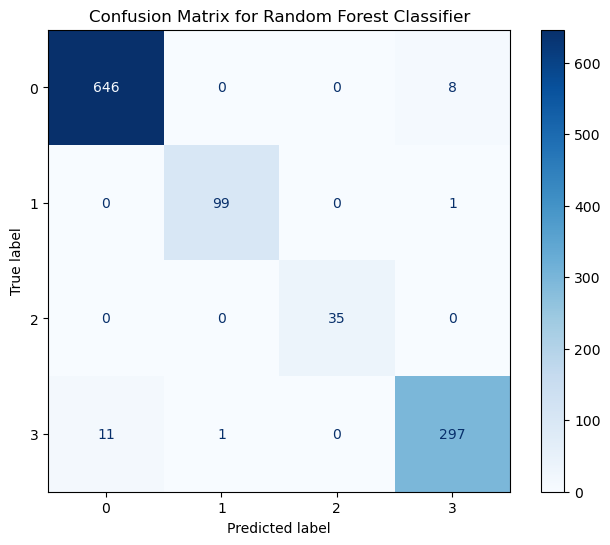

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax, cmap="Blues")
ax.set_title("Confusion Matrix for Random Forest Classifier")
plt.show()

一個圖就是要搭配相關資料，對於混淆矩陣來說，準確率是最直觀的評估指標，其定義為：

$$
\text{Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Number of Predictions}} = \frac{\sum_{i=0}^{K-1} C_{ii}}{\sum_{i=0}^{K-1} \sum_{j=0}^{K-1} C_{ij}}
$$

在統計學上，這是在測試集 $\mathcal{D}_{test}$ 上計算出來的樣本準確率，用來估計模型 $\hat{f}_{\text{rf}}(x)$ 在未來遇到來自同一個母體分佈 $P(X)$ 的新資料時的真實準確率

In [53]:
accuracy_rf = accuracy_score(y_test, y_pred)
print(f"Accuracy of the model is: {accuracy_rf:.4f}")

Accuracy of the model is: 0.9827


### Step E. 超參數調整

所謂超參數（Hyperparameters）是在模型訓練之前就設定好來控制模型學習過程的參數，在這案例中會關住在 **森林中決策樹的數量** `n_estimators` 以及 **每一棵決策樹的最大深度** `max_depth`。換句話說，現在就是要針對不同超參數給出的組合中，嘗試找出最佳的參數

#### E.1 調整 `n_estimators`

如果單純輸入數字調整，實在有點慢，因此可以做一個 `for` 迴圈從小數字跑到大的數字，且對於每個數字都重複

1. 初始化一個新的 `RandomForestClassifier`，設定 `n_estimators`
2. 用相同的訓練集 `(X_train, y_train)` 進行訓練
3. 用相同的測試集 `(X_test, y_test)` 進行預測與評估
4. 記錄每一個 `n_estimators` 所對應的準確率

最後直接將結果輸出成圖表就可以了

n_estimators: 10, Accuracy: 0.9799636, Time taken: 0.02 seconds
n_estimators: 12, Accuracy: 0.9799636, Time taken: 0.02 seconds
n_estimators: 14, Accuracy: 0.9808743, Time taken: 0.02 seconds
n_estimators: 16, Accuracy: 0.9826958, Time taken: 0.02 seconds
n_estimators: 18, Accuracy: 0.9808743, Time taken: 0.02 seconds
n_estimators: 20, Accuracy: 0.9799636, Time taken: 0.03 seconds
n_estimators: 22, Accuracy: 0.9817851, Time taken: 0.03 seconds
n_estimators: 24, Accuracy: 0.9799636, Time taken: 0.03 seconds
n_estimators: 26, Accuracy: 0.9799636, Time taken: 0.04 seconds
n_estimators: 28, Accuracy: 0.9808743, Time taken: 0.04 seconds
n_estimators: 30, Accuracy: 0.9808743, Time taken: 0.04 seconds
n_estimators: 32, Accuracy: 0.9808743, Time taken: 0.04 seconds
n_estimators: 34, Accuracy: 0.9808743, Time taken: 0.04 seconds
n_estimators: 36, Accuracy: 0.9808743, Time taken: 0.05 seconds
n_estimators: 38, Accuracy: 0.9808743, Time taken: 0.05 seconds
n_estimators: 40, Accuracy: 0.9808743, T

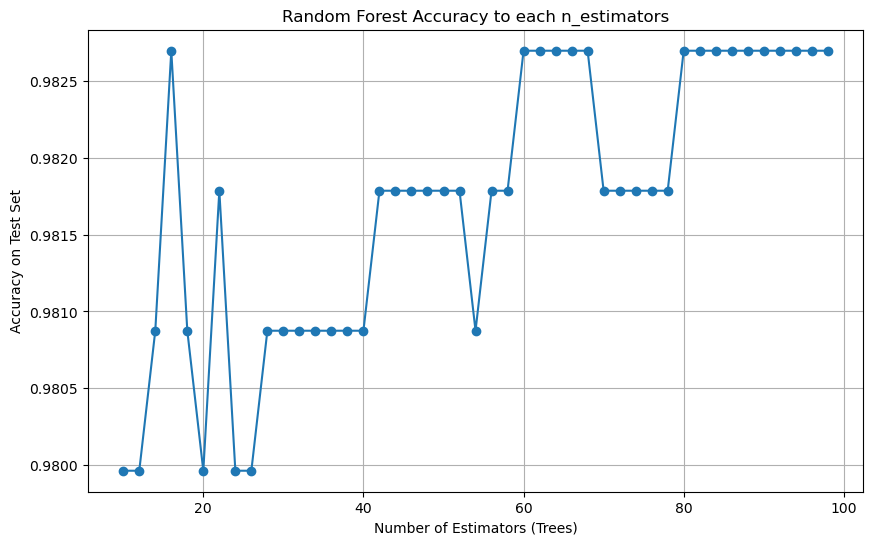

In [30]:
import time
import matplotlib.pyplot as plt

estimator_list = list(range(10, 100, 2))
accuracy_scores_rf = []  # List to store results

for n in estimator_list:
    start_time = time.time()  # Record start time

    # Initialize, train, predict, calculate accuracy
    model = RandomForestClassifier(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy_scores_rf.append(acc)

    end_time = time.time()  # Record end time
    print(
        f"n_estimators: {n}, Accuracy: {acc:.7f}, Time taken: {end_time - start_time:.2f} seconds"
    )

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(estimator_list, accuracy_scores_rf, marker="o", linestyle="-")
ax.set_title("Random Forest Accuracy to each n_estimators")
ax.set_xlabel("Number of Estimators (Trees)")
ax.set_ylabel("Accuracy on Test Set")
ax.grid(True)
plt.show()

實驗結果中，可以看到當 `n_estimators` 從 10 增加時到 16 時，準確率從 0.9800 稍微上升到 0.9827。這是因為決策樹增加使得模行預測結果因為 ensemble 而趨於穩定，且 variance 有降低；在 60-70 區間也有峰值產生，但最穩定處還是在 80 開始。意思就是，在 `n_estimators=80` 時，隨機森林已經充分多樣性，再增加樹木也無法提供有效資訊改善模型的預測邊界了，後續樹的增加只會增加線性時間開銷

根據以上，這次選定  `n_estimators=80` 作為模型最後輸出的 hyperparameter 之一

#### E.2 調整 `max_depth`

接下來固定 `n_estimators=80` 這參數來測試一系列 `max_depth` 的值，觀察樹逐漸長大時，模型的準確率會如何變化。主要目標就是要找到那個能平衡誤差（bias）與變異性的最佳深度

原則上這次不限制深度；同時，也可以觀察訓練集上的準確率，以判斷是否過擬合。因此

In [31]:
depth_options = list(range(3, 21)) + [None]

# List to store results
accuracy_scores_depth = []
# Observe accuracy on training set to determine if overfitting
train_accuracy_scores_depth = []

接下來要初始化模型，固定 `n_estimators=80` 開始進行訓練。評估分為兩步驟：測試集準確率、以及訓練集準確率。那因為在 `depth_options` 有一個 `[None]` ，所以要將其轉換為字串輸出（見註解處）

max_depth: 3   , Test Accuracy: 0.9627, Train Accuracy: 0.9651, Time: 0.10s
max_depth: 4   , Test Accuracy: 0.9645, Train Accuracy: 0.9704, Time: 0.10s
max_depth: 5   , Test Accuracy: 0.9672, Train Accuracy: 0.9756, Time: 0.10s
max_depth: 6   , Test Accuracy: 0.9718, Train Accuracy: 0.9856, Time: 0.11s
max_depth: 7   , Test Accuracy: 0.9763, Train Accuracy: 0.9911, Time: 0.11s
max_depth: 8   , Test Accuracy: 0.9763, Train Accuracy: 0.9977, Time: 0.11s
max_depth: 9   , Test Accuracy: 0.9791, Train Accuracy: 0.9991, Time: 0.12s
max_depth: 10  , Test Accuracy: 0.9818, Train Accuracy: 1.0000, Time: 0.11s
max_depth: 11  , Test Accuracy: 0.9836, Train Accuracy: 1.0000, Time: 0.11s
max_depth: 12  , Test Accuracy: 0.9836, Train Accuracy: 1.0000, Time: 0.11s
max_depth: 13  , Test Accuracy: 0.9818, Train Accuracy: 1.0000, Time: 0.11s
max_depth: 14  , Test Accuracy: 0.9818, Train Accuracy: 1.0000, Time: 0.11s
max_depth: 15  , Test Accuracy: 0.9827, Train Accuracy: 1.0000, Time: 0.11s
max_depth: 1

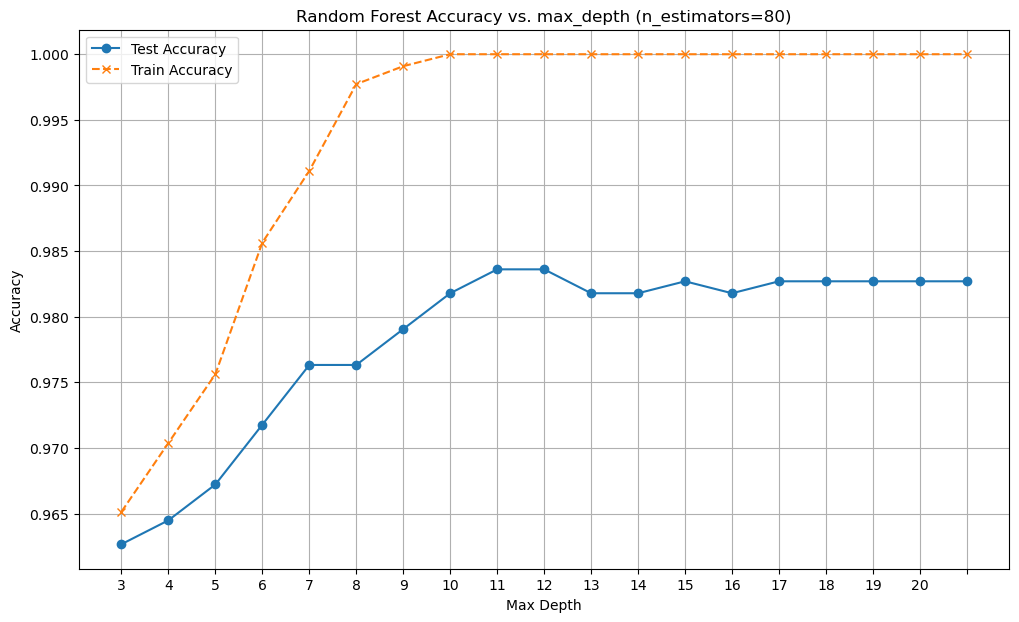

In [32]:
for d in depth_options:
    start_time = time.time()

    # Initialize model, fix n_estimators=80 then train the model
    model = RandomForestClassifier(n_estimators=80, max_depth=d, random_state=42)
    model.fit(X_train, y_train)

    # Evaluation 1. Test set accuracy
    y_pred_test = model.predict(X_test)
    acc_test_rf = accuracy_score(y_test, y_pred_test)
    accuracy_scores_depth.append(acc_test_rf)

    # Evaluation 2. Training set accuracy
    y_pred_train = model.predict(X_train)
    acc_train_rf = accuracy_score(y_train, y_pred_train)
    train_accuracy_scores_depth.append(acc_train_rf)

    end_time = time.time()

    # Convert None to string for convenient printing
    depth_str = "None" if d is None else str(d)
    print(
        f"max_depth: {depth_str:<4}, Test Accuracy: {acc_test_rf:.4f}, Train Accuracy: {acc_train_rf:.4f}, Time: {end_time - start_time:.2f}s"
    )

fig, ax = plt.subplots(figsize=(12, 7))
ax.plot(
    range(len(depth_options)),
    accuracy_scores_depth,
    marker="o",
    linestyle="-",
    label="Test Accuracy",
)
ax.plot(
    range(len(depth_options)),
    train_accuracy_scores_depth,
    marker="x",
    linestyle="--",
    label="Train Accuracy",
)

ax.set_title("Random Forest Accuracy vs. max_depth (n_estimators=80)")
ax.set_xlabel("Max Depth")
ax.set_ylabel("Accuracy")
ax.set_xticks(range(len(depth_options)))
ax.set_xticklabels(depth_options)
ax.legend()
ax.grid(True)
plt.show()

這張圖裡面有 Bias-Variance 權衡的過程，可以這樣解讀：

1. Underfitting / High Bias

   當 `max_depth` 在 3 到 7 時，Test Accuracy 和 Train Accuracy 兩者比較低，且差距不大。也就是說這邊的模型的「複雜度」不足導致 bias 很高，無法充分學到資料中的規律

2. Overfitting / High Variance

   當 `max_depth` 到 11 開始時，Train Accuracy 已經達到 100%，也就是模型已經完全掌握訓練資料了。可以觀察到在 Test Accuracy 已經不是穩定上升的狀態，而是在 `max_depth=13` 開始出現下降，在 `max_depth` 持續提昇下，準確度也就維持在 98.2%。這情況就是 **Overfitting**，就是模型對已知資料已經充分完美，但在面對未知資料的泛化能力就沒那麼好了

3. Good Fit

   在 `max_depth=11` 和 `12` 時達到了 0.9836 的峰值，這就是在 bias 和 variance 之間找到的最佳點

所以綜合以上，最後隨機森林模型使用的超參數組合就會是 `n_estimators=80` 與 `max_depth=11`，可以重新輸出 confusion matrix 觀察

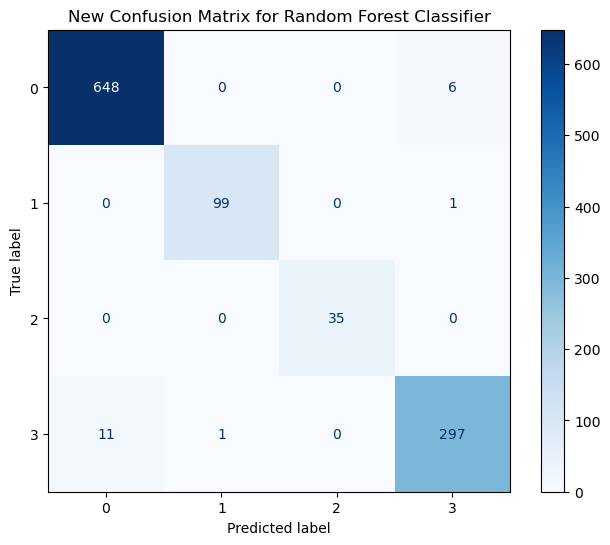

The accuracy of the new model is: 0.9827


In [52]:
rfc_new = RandomForestClassifier(n_estimators=60, max_depth=11, random_state=42)
rfc_new.fit(X_train, y_train)

cm_new = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_new)
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax, cmap="Blues")
ax.set_title("New Confusion Matrix for Random Forest Classifier")
plt.show()

new_accuracy_rf = accuracy_score(y_test, y_pred)
print(f"The accuracy of the new model is: {new_accuracy_rf:.4f}")


儘管 cluster 0 正確預測的樣本數提昇幅度很小，但不管如何還是比較好的結果了

## Section 4. SVM Classification / Regression

**支援向量機（Support Vector Machine）** 是一個從分類問題延伸到回歸問題的一種監督式的學習方法， 簡單來說就是要找到一個間隔（Margin）讓類別之間的邊界可以最大，使得類別間可以完整分隔開。但若同學要理解 SVM 的背景，這就會需要用到線性代數、高等微積分、最佳化理論、以及一些統計學的知識

另外，其實對於這種超過 3 維的數學表達式，很多概念要直接放棄「幾何」而改用「物件」進行思考，會簡單很多。因為人類根本沒有辦法想像一個八度空間上面兩個點的距離到底是多少，線性代數只是幫我們去想像或揣摩高維度空間的行為而已

作業主要要求的是 _Step C_ 的 SVR 操作，而 _Step B_ 只是用來比較出「為何 SVM 分類在表線上可能比 RF 還要好」

### Step A. SVM 原理

> 前面 _A.1_ 到 _A.4_ 在技術上可以跳過，直接進入作業範圍 _A.5_ 的 SVR。但 SVR 的許多設計思想，都是從 SVM 分類問題直接類比和延伸過來的，所以這邊會寫下主要的 SVM 內容，給大家參考

#### A.1 Maximum Margin Classifier

給定一個訓練資料集 $\mathcal{D}$，其定義為一個由 $n$ 個樣本組成的集合 $D = \{ (\mathbf{x}_i, y_i) \}_{i=1}^n, \; \forall \: i \in \{1, \ldots, n\}$；樣本 $\mathbf{x}_i$ 是一個 $p$ 維實數向量，亦即 $\mathbf{x}_i \in \mathbb{R}^p$，而其對應的標籤 $y_i$ 屬於一個二元集合，亦即 $y_i \in \{-1, 1\}$

對於 SVM 處理分類問題，最基礎概念就是用 **最大間隔分類器（Maximum Margin Classifier, MMC）** 。想像一個簡單的二元分類問題，目標是在一個平面上畫一條直線，將兩種不同的點完全分開。一般來說，存在無數條線可以分開兩個群體，但 SVM 好奇的就是「哪一條線最好」？簡單來說就是 **找到一條讓線的兩邊邊緣（margin）到最大值的直線**

這樣想很抽象，可以參考 [這張圖](https://www.researchgate.net/publication/342254494/figure/fig2/AS:1179986945937410@1658342219100/Optimal-hyperplane-The-structure-of-hyperplane-WTX-b0-separates-2-labels-the-crosses.png) 搭配文字說明

在數學上，這條「直線」在高維度空間中被稱為超平面 (Hyperplane)。在一個 $p$ 維的特徵空間中，一個超平面的定義如下：


> ##### Definition of a Hyperplane
> 一個超平面之數學定義如下
> 
> $$\mathbf{w}^T \mathbf{x} + b = 0$$
> 
> 其中 
> - $\mathbf{w} = [w_1, w_2, \ldots, w_p] \in \mathbb{R}^p$ 是一個權重向量，可以當作超平面的「方向」或「斜率」
> - $\mathbf{x} = [x_1, x_2, \ldots, x_p] \in \mathbb{R}^p$ 是特徵向量，也就是每一個資料點
> - $b \in \mathbb{R}$ 是誤差（bias）或截距（intercept），主要是超平面的「位置」

只要找到了這個超平面，那對於任何一個新的資料點 $\mathbf{x}^*$，就都可以透過計算 $\mathbf{w}^T \mathbf{x}^* + b$ 的正負號來進行分類

那現在問題是，要如何定義邊界？在數學上是 $\mathbf{w}^T \mathbf{x} + b = 1$ 與 $\mathbf{w}^T \mathbf{x} + b = -1$，而那些剛好在這兩個邊界平面上的資料點，就稱為支援向量（Support Vectors）

綜合以上，最大間隔分類器的問題，可以在數學上定義成一個 **帶有約束條件的凸函數最佳化問題**，也就是要解 

$$
\underset{\mathbf{w}, b}{\text{minimize}} \; \frac{1}{2} \|\mathbf{w}\|^2 \quad \text{ subject to} \quad 1 - y_i(\mathbf{w}^T \mathbf{x}_i + b) \le 0, \; \forall \: i=1, \ldots, n
$$

那為了處理這 $n$ 個約束條件，在實分析（在台灣會說高等微積分）處理方式就是使用 Lagrange Multipliers $\boldsymbol{\alpha} = [\alpha_1, \alpha_2, \ldots, \alpha_n]$，其中 $\alpha_i \ge 0$



> ##### Definition of the Lagrangian
> 拉格朗日函數 L 如下：
> 
> $$\mathcal{L}(\mathbf{w}, b, \boldsymbol{\alpha}) = \frac{1}{2} \|\mathbf{w}\|^2 + \sum_{i=1}^{n} \alpha_i (1 - y_i(\mathbf{w}^T \mathbf{x}_i + b))$$

#### A.2 KKT Conditions

> 有關最佳化定理相關內容，可以參考 [臺灣師範大學某教職員的 Optimization 演算法筆記](https://web.ntnu.edu.tw/~algo/Optimization.html#:~:text=Karush%E2%80%93Kuhn%E2%80%93Tucker%20conditions)

在微積分中學過 **一次微分** $\frac{d}{dx}$ 為零的情況，可以找到極值，但那是單變數的情況；那在多變數微積分中，會說 **梯度（$\nabla$）** 必須為零

1. 將 $\mathcal{L}$ 視為 $\mathbf{w}$ 的函數，並計算其梯度

   $$
   \begin{aligned}
   \nabla_{\mathbf{w}} \mathcal{L} &= \frac{\partial}{\partial \mathbf{w}} \left( \frac{1}{2} \mathbf{w}^T \mathbf{w} - \sum_{i=1}^{n} \alpha_i y_i \mathbf{w}^T \mathbf{x}_i + \ldots \right) \\
   &= \mathbf{w} - \sum_{i=1}^{n} \alpha_i y_i \mathbf{x}_i \\
   &= \mathbf{0}
   \end{aligned}
   $$

   可以觀察到最佳權重向量 $\mathbf{w}^*$ 可以看成是訓練樣本 $\mathbf{x}_i$ 的線性組合

2. 對 b 取偏微分

   $$
   \frac{\partial \mathcal{L}}{\partial b} = \frac{\partial}{\partial b} \left( \ldots - \sum_{i=1}^{n} \alpha_i y_i b \right) = - \sum_{i=1}^{n} \alpha_i y_i
   $$

   設定結果為零
   
   $$
   \sum_{i=1}^{n} \alpha_i y_i = 0
   $$

   這就是 Lagrange Multiplier 的約束條件

現在就可以將上述兩個偏微分的解代回到原始的 $\mathcal{L}$ 中消除原始變數 $\mathbf{w}$ 和 $b$

那除了梯度為零的穩定性條件外，還有一個條件叫做互補鬆弛性（Complementary Slackness），也就是

$$
\alpha_i (1 - y_i(\mathbf{w}^T \mathbf{x}_i + b)) = 0
$$

這數學式其實在說的是，如果一個數據點不是支援向量（就不在邊界上），那 $1 - y_i(\ldots)$ 這一項就不為零，因此該數據點的 Lagrange multiplier $\alpha_i$ 就必須為零；只有一個數據點是支援向量（在邊界上）時，其 $\alpha_i$ 才會不為零

這就是為何只有支援向量（SV）會決定最後的超平面，因為只有 SV 的 $\alpha_i$ 值才對 $\mathbf{w} = \sum \alpha_i y_i \mathbf{x}_i$ 有貢獻

#### A.3 Soft Margin Classifier

前面討論的內容，都是在一個資料可以完美做到線性分割的情況，但在現實世界中的資料並不是這樣。所以如果這種方法直接用來處理分類，就會有兩個問題

1. 如果資料集中存在一些雜訊或異常值，導致資料非線性可分，該怎麼辦？
2. 是否能在「所有點都必須在間隔之外」的嚴格條件下妥協，以換來一個泛化能力更好的模型？

為了解決這問題，這時候就要把前面的 MMC 做一些修改了，也就是允許一些點可以突破 margin 的硬性規定。對每一個資料點 $\mathbf{x}_i$ 引入一個鬆弛變數，定義 $\xi_i \ge 0$

> ##### Definition of Slack Variables $\xi_i$
> - 如果 $\xi_i = 0$，代表資料點 $\mathbf{x}_i$ 完全滿足硬間隔的約束條件，即 $y_i(\mathbf{w}^T \mathbf{x}_i + b) \ge 1$
> - 如果 $0 < \xi_i \le 1$，代表資料點 $\mathbf{x}_i$ 位於 margin 之內，但還可以算是被正確分類
> - 如果 $\xi_i > 1$，代表資料點 $\mathbf{x}_i$ 已經到超平面的另外一側，也就是被錯誤分類

那接下來，上面的最佳化問題就會變成

$$
\begin{aligned}
\underset{\mathbf{w}, b, \boldsymbol{\xi}}{\text{minimize}} \quad & \frac{1}{2} \|\mathbf{w}\|^2 + C \sum_{i=1}^{n} \xi_i \\
\text{subject to} \quad & y_i(\mathbf{w}^T \mathbf{x}_i + b) \ge 1 - \xi_i \\
& \xi_i \ge 0 \quad \text{for } i=1, \ldots, n
\end{aligned}
$$

可以注意到這邊多出了一個超參數 $C \gt 0$，這稱為 **懲罰參數**，也就是說要在間隔最大化的情況下，新增一個懲罰因數。這個 $C$ 是這樣權衡的：
- 如果 $C$ 很大，代表違規的懲罰比重很高，模型就會盡可能讓 $\xi_i$ 趨近於 0 使得模型的行為越來越像是 Hard Margin Classifier
- 如果 $C$ 很小，代表模型對違規的容忍度比較高，有些點就可以違反間隔約束讓泛化能力更好，但過多也會出現無效分類的狀況

這時如果重複處理完全相同的拉格朗日對偶化過程，也就是引入拉格朗日乘數，對 $\mathbf{w}$、$b$、與 $\xi_i$ 做偏微分，並令結果為零，可以發現對偶問題在形式上非常相近

$$
\begin{aligned}
\underset{\boldsymbol{\alpha}}{\text{maximize}} \quad W(\boldsymbol{\alpha}) = & \sum_{i=1}^{n} \alpha_i - \frac{1}{2} \sum_{i=1}^{n} \sum_{j=1}^{n} \alpha_i \alpha_j y_i y_j (\mathbf{x}_i^T \mathbf{x}_j) \\
\text{subject to} \quad & 0 \le \alpha_i \le C, \quad \text{for } i=1, \ldots, n \\
& \sum_{i=1}^{n} \alpha_i y_i = 0
\end{aligned}
$$

與前述 hard margin 的情況相比，唯一改變的是對拉格朗日乘數 $\alpha_i$ 的約束，從原本的 $\alpha_i \ge 0$ 變成了 $0 \le \alpha_i \le C$。也就是說，soft margin 的引入沒有改變問題結構，只是在求解的過程中增加一個邊界

#### A.4 The Kernel Trick

到目前為止，我們所有的模型都試圖用一條直線（或一個平坦的超平面）來分割資料，但如果資料本身得結構是非線性的呢？例如，一組資料點可能呈現環狀分佈，內圈是一種顏色、而外圈是另一種，那在這種情況下，不存在一條直線分開這些點。這時候就會用到 **核技巧（kernel trick）**

也就是說，如果資料在目前的維度中是為線性不可分割，那可以直接把資料映射到一個更高維度的空間，讓資料在這個新的空間中變得線性可分。在數學上，從原始特徵空間 $\mathcal{X}$ 映射到一個更高維度特徵空間 $\mathcal{H}$ 的轉換，是由一個函數 $\phi(\mathbf{x})$ 所定義的

>##### Definition of a Feature Map
>
> 令特徵映射 $\phi$ 為一個函數，可將原始空間中的向量 $\mathbf{x} \in \mathcal{X}$ 轉換為高維空間中的向量 $\phi(\mathbf{x}) \in \mathcal{H}$，寫為 $\phi: \mathcal{X} \to \mathcal{H}$

理論上可以先將所有的資料點 $\mathbf{x}_i$ 都透過 $\phi$ 轉換成 $\phi(\mathbf{x}_i)$，然後再用前面推導的線性 SVM 演算法，在這個新的高維空間 $\mathcal{H}$ 中找出最佳的分類超平面。但就會遇到一個很大的問題：這個高維空間 $\mathcal{H}$ 的維度可能非常非常高，甚至是無限維的，因此直接計算 $\phi(\mathbf{x}_i)$ 的成本可能會高到電腦記憶體直接炸掉。但這在 SVM 中並不會發生，因為 SVM 的最佳化過程並不需要知道 $\phi(\mathbf{x}_i)$ 具體的映射矩陣長什麼樣子。

回想 soft margin 的對偶問題

$$
\underset{\boldsymbol{\alpha}}{\text{maximize}} \quad W(\boldsymbol{\alpha}) = \sum_{i=1}^{n} \alpha_i - \frac{1}{2} \sum_{i=1}^{n} \sum_{j=1}^{n} \alpha_i \alpha_j y_i y_j (\mathbf{x}_i^T \mathbf{x}_j)
$$

可以發現資料點 $\mathbf{x}_i^T \mathbf{x}_j$ 唯一出現的形式就是內積，也就是說可以建立一個 Kernel function 使得計算結果剛好等於資料點在高維空間中的內積 $\phi(\mathbf{x}_i)^T \phi(\mathbf{x}_j)$，完全跳過實際的 mapping

> ##### Definition of a Kernel Function
> 
> 定義 $K$ 為一個函數，對於給定的特徵映射 $\phi$，滿足 $K(\mathbf{x}_i, \mathbf{x}_j) = \phi(\mathbf{x}_i)^T \phi(\mathbf{x}_j)$ ，則此時 $K$ 稱為 Kernel Function

這時就可以把核函數直接代入對偶問題中，得到非線性的 SVM 最佳化問題：

$$
\begin{aligned}
\underset{\boldsymbol{\alpha}}{\text{maximize}} \quad W(\boldsymbol{\alpha}) = & \sum_{i=1}^{n} \alpha_i - \frac{1}{2} \sum_{i=1}^{n} \sum_{j=1}^{n} \alpha_i \alpha_j y_i y_j K(\mathbf{x}_i, \mathbf{x}_j) \\
\text{subject to} \quad & 0 \le \alpha_i \le C, \quad \text{for } i=1, \ldots, n \\
& \sum_{i=1}^{n} \alpha_i y_i = 0
\end{aligned}
$$

那常見的 Kernel function 包含

- **Gaussian RBF Kernel（這是 `sklearn` 預設使用的）**

   $$
   K(\mathbf{x}_i, \mathbf{x}_j) = \exp(-\gamma \|\mathbf{x}_i - \mathbf{x}_j\|^2)
   $$
   
   > 有關 Gussian Kernel Function 內容，可以參考 
   >
   >[C. K. I. Williams and C. E. Rasmussen, "Gaussian processes for regression," in _Advances in Neural Information Processing Systems 8_, D. S. Touretzky, M. C. Mozer, and M. E. Hasselmo, Eds. Cambridge, MA, USA: MIT Press, 1996, pp. 514–520.](https://research.aston.ac.uk/en/publications/gaussian-processes-for-regression)


- Polynomial Kernel 

   $$
   K(\mathbf{x}_i, \mathbf{x}_j) = (\gamma \mathbf{x}_i^T \mathbf{x}_j + r)^d
   $$

   > 有關 Polynomial Kernel Function 內容，可以參考 
   >
   > [Boser, B. E., Guyon, I. M., & Vapnik, V. N. (1992). A training algorithm for optimal margin classifiers. _Proceedings of the Fifth Annual Workshop on Computational Learning Theory_, 144–152.](https://doi.org/10.1145/130385.130401)

#### A.5 Support Vector Regression

前面的 SVM 是找到一個 hyperplane 將點分群，那 SVR 就會是找到一條線或曲線來擬合資料的趨勢。傳統的回歸如最小平方法是找出所有點的最小誤差平方和，而 SVR 則是找到一個 tube，讓盡可能多的點落在 tube 內，並且只關心那些落在管道外的點

也就是說，現在在意的問題就不是一個最大的「分類間隔」，而是定義一個不敏感帶 $\epsilon$-insensitive tube

> ##### Definition of the $\epsilon$-insensitive tube
> 
> 定義函數 $f(\mathbf{x}) = \mathbf{w}^T \mathbf{x} + b$，在其周圍建立一個寬度為 $2\epsilon$ 的區域。則滿足
> 
> $$\left|y_i - f(\mathbf{x}_i)\right| \le \epsilon, \quad \forall \: i$$
> 
> 就認為這個點的誤差為零，也就是說對模型沒有任何損失 (loss)
> 

所以這個 tube 就會是 SVR 的間隔，此時目標變為最小化模型的複雜度（即 $\|\mathbf{w}\|^2$）以及管道外點的誤差

重新寫下帶有鬆弛變數 $\xi_i, \xi_i^*$ 的原始問題

$$
\begin{aligned}
\underset{\mathbf{w}, b, \boldsymbol{\xi}, \boldsymbol{\xi}^*}{\text{minimize}} \quad & \frac{1}{2} \|\mathbf{w}\|^2 + C \sum_{i=1}^{n} (\xi_i + \xi_i^*) \\
\text{subject to} \quad & y_i - (\mathbf{w}^T \mathbf{x}_i + b) \le \epsilon + \xi_i \\
& (\mathbf{w}^T \mathbf{x}_i + b) - y_i \le \epsilon + \xi_i^* \\
& \xi_i \ge 0, \quad \xi_i^* \ge 0 \quad \text{for } i=1, \ldots, n
\end{aligned}
$$

要解出四組不等式約束的問題很麻煩，因為需要帶入四組非負的 Lagrange multiplier

$$
\begin{aligned}
\mathcal{L}(\mathbf{w}, b, \boldsymbol{\xi}, \boldsymbol{\xi}^*, \boldsymbol{\alpha}, \boldsymbol{\alpha}^*, \boldsymbol{\mu}, \boldsymbol{\mu}^*) = & \frac{1}{2} \|\mathbf{w}\|^2 + C \sum_{i=1}^{n} (\xi_i + \xi_i^*) \\
& + \sum_{i=1}^{n} \alpha_i (y_i - \mathbf{w}^T \mathbf{x}_i - b - \epsilon - \xi_i) \\
& + \sum_{i=1}^{n} \alpha_i^* (\mathbf{w}^T \mathbf{x}_i + b - y_i - \epsilon - \xi_i^*) \\
& - \sum_{i=1}^{n} \mu_i \xi_i - \sum_{i=1}^{n} \mu_i^* \xi_i^*
\end{aligned}
$$

現在就要對這個 Lagrange functions $\mathbf{w}$、$b$、$\xi_i$、與 $\xi_i^*$ 做偏微分，並令偏導數為零

1. 對 $w$

   $$\nabla_{\mathbf{w}} \mathcal{L} = \mathbf{w} - \sum_{i=1}^{n} \alpha_i \mathbf{x}_i + \sum_{i=1}^{n} \alpha_i^* \mathbf{x}_i = \mathbf{0} \quad \implies \quad \mathbf{w} = \sum_{i=1}^{n} (\alpha_i - \alpha_i^*) \mathbf{x}_i
   $$

2. 對 $b$
   
   $$
   \frac{\partial \mathcal{L}}{\partial b} = - \sum_{i=1}^{n} \alpha_i + \sum_{i=1}^{n} \alpha_i^* = 0 \quad \implies \quad \sum_{i=1}^{n} (\alpha_i - \alpha_i^*) = 0
   $$

3. 對 $\xi_i$​

   $$
   \frac{\partial \mathcal{L}}{\partial \xi_i} = C - \alpha_i - \mu_i = 0 \quad \implies \quad \alpha_i + \mu_i = C
   $$
   
4. 對 $\xi_i^∗$​

   $$
   \frac{\partial \mathcal{L}}{\partial \xi_i^*} = C - \alpha_i^* - \mu_i^* = 0 \quad \implies \quad \alpha_i^* + \mu_i^* = C
   $$

由於 $\mu_i, \mu_i^*$ 必須大於等於 0，所以從後兩個條件可以導出 $\alpha_i \le C$ 和 $\alpha_i^* \le C$

現在將這四個穩定性條件的結果代回到 Lagrange function $\mathcal{L}$ 中消除所有原始變數。經過一系列的代數化簡後，最後會得到一個只剩下 $\boldsymbol{\alpha}$ 和 $\boldsymbol{\alpha}^*$ 的最大化問題

$$
\begin{aligned}
\underset{\boldsymbol{\alpha}, \boldsymbol{\alpha}^*}{\text{maximize}} \quad W(\boldsymbol{\alpha}, \boldsymbol{\alpha}^*) = & -\frac{1}{2} \sum_{i=1}^{n} \sum_{j=1}^{n} (\alpha_i - \alpha_i^*)(\alpha_j - \alpha_j^*)(\mathbf{x}_i^T \mathbf{x}_j) \\
& - \epsilon \sum_{i=1}^{n}(\alpha_i + \alpha_i^*) + \sum_{i=1}^{n} y_i(\alpha_i - \alpha_i^*) \\
\text{subject to} \quad & \sum_{i=1}^{n} (\alpha_i - \alpha_i^*) = 0 \quad \text{and} \quad 0 \le \alpha_i, \alpha_i^* \le C \quad \text{for } i=1, \ldots, n
\end{aligned}
$$

可以看到數據點最後還是會以內積 $(\mathbf{x}_i^T \mathbf{x}_j)$ 的形式出現，因此也可以在這裡操作 kernel method，只需將內積用核函數 $K(\mathbf{x}_i, \mathbf{x}_j)$ 表達即可

### Step B. SVM 操作

在我們的 SVM 最佳化問題中，演算法需要處理的是一組數據點 $\{ (\mathbf{x}_i, y_i) \}_{i=1}^n$。這段程式碼的目的，就是將我們原始的就診紀錄，轉換成這種數學上可處理的格式

那特徵向量 $\mathbf{x}_i$ 和目標值 $y_i$，就會分別對應到 **標準化後特徵** `df_patient_scaled`（不包含 `cluster` 欄位分類）以及 **分類出的 cluster**，並且分類出 80/20 的訓練集與測試集。

因為 SVM 的目標是找出 $\|\mathbf{w}\|^2$ 最小值，換句話說就是要找到間隔 $\frac{2}{\|\mathbf{w}\|}$ 最大值。而間隔是基於特徵空間中的 Eudician 距離計算的，如果資料尺度不均衡，就會讓超平面會嚴重「偏向」那些數值尺度較小的特徵，這樣分類器就沒用了。因此

In [51]:
X_scaled = df_patient_scaled
y = df_patient["cluster"]

X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("The dimension of the selected training set is:", X_train_scaled.shape)

The dimension of the selected training set is: (4388, 8)


接下來要 

1. 初始化一個 SVM 分類器，明確指定使用 `rbf` 核心，並設定一個起始的 `C` ，這樣就在標準化後的訓練集上
2. 訓練模型
3. 執行預測
4. 評估準確率了

In [49]:
from sklearn.svm import SVC

svm_clf = SVC(kernel="rbf", C=10, gamma="scale", random_state=42) # 1
svm_clf.fit(X_train_scaled, y_train) # 2
y_pred_svm = svm_clf.predict(X_test_scaled) # 3
accuracy_svm = accuracy_score(y_test, y_pred_svm) # 4

print(f"SVM model accuracy on the test set: {accuracy_svm:.4f}")

SVM model accuracy on the test set: 0.5938


其實這段程式碼非常簡潔，但其背後執行的就是前面 Step A 中很複雜的數學推導過程，處理的是 **非線性 soft margin**。其中 `kernel='rbf'` 就是前面 _A.4_ 中的 Gussian RBF Kernel function，這是對應非線性問題的；而 `C=10` 這個參數則是前面 _A.3_ 中的懲罰參數 `C`，處理的是 soft margin

可以比較前面隨機森林給出的最佳準確率是 0.9836，但 SVM 還沒調整就 0.9945 了。有人可能會直接問

> RF 本身也是非線性決策邊界，為何 SVM 表現較佳？

因為 RF 的非線性是由許多與座標軸平行的直線（或超平面）所組成去近似的，但 RBF Kernel 的 SVM 的決策邊界本身就是連續的（continuous）曲線（或面）

### Step C. SVR 操作

作業要求預測病患「未來」的就診次數，那基本上就要處理時間資料了。而 SVR 作為一種迴歸演算法，其預測目標 $y_i$ 也必須是連續型的數值。那現在問題實際上就是

> 「就診次數」如何隨著「時間」變化？

因此在這個任務中，可以發現 特徵 就是時間、而 目標 就是就診次數。因此就要做出一個時間與次數對應的資料點，這樣 SVR 才能學習到一個函數 $f(\text{time}) = \text{(predicted times of visit)}$

In [48]:
df_monthly_visits = (
    df.groupby("病人ID").resample("ME").size().reset_index(name="visits")
)
df_monthly_visits = df_monthly_visits.rename(columns={"日期": "month"})


start_date = df_monthly_visits["month"].min()
df_monthly_visits["time_idx"] = (  # 'idx' is an abbr of index
    df_monthly_visits["month"].dt.year - start_date.year
) * 12 + (df_monthly_visits["month"].dt.month - start_date.month)

print("Transformed time series data")
print(df_monthly_visits.head())

Transformed time series data
     病人ID      month  visits  time_idx
0  109988 2018-11-30       5         0
1  109988 2018-12-31       5         1
2  109988 2019-01-31       2         2
3  109988 2019-02-28       2         3
4  109988 2019-03-31       3         4


/tmp/ipykernel_181433/3402194744.py:2: FutureWarning: DataFrameGroupBy.resample operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df.groupby("病人ID").resample("ME").size().reset_index(name="visits")


現在就要開始準備資料集 $D = \{ (\mathbf{x}_i, y_i) \}_{i=1}^n$ 了。其中需要兩個變數 `X_cross` 與 `y_cross` 分別對應到

1. 特徵向量 $\mathbf{x}_i \in \mathbb{R}^6$ 即用 6 個疫情前的指標來描述一位病患
2. 目標值 $y_i \in \mathbb{R}$ 即要模型學會預測的「疫情後就診次數」

隨後原先資料集合 $\mathcal{D}$ 會透過隨機抽樣，分割成訓練集 $\mathcal{D}_{train}$ 和測試集 $\mathcal{D}_{test}$。分割的目的跟之前一樣，都是要模型學會泛化誤差之下的無偏估計（unbiased estimate）

In [37]:
X_cross = df_patient[
    ["before_visits", "before_spending", "visits_A", "visits_B", "visits_C", "visits_D"]
]

y_cross = df_patient["after_visits"]

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_cross, y_cross, test_size=0.2, random_state=42
)

print("X_train_c\n", X_train_c)
print()
print("y_train_c\n", y_train_c)

X_train_c
         before_visits  before_spending  visits_A  visits_B  visits_C  visits_D
病人ID                                                                          
113513          3.000        55000.000         1         2         0         0
112721          5.000        90000.000         3         1         2         1
115834          8.000       154000.000         1         2         2         4
116317          2.000        36000.000         0         1         1         0
115291          6.000       105000.000         3         2         3         2
...               ...              ...       ...       ...       ...       ...
114465          8.000       145000.000         4         2         0         3
116222          3.000        49000.000         2         1         0         0
116265          5.000        94000.000         2         4         0         1
116467          6.000       111000.000         1         2         2         1
110874          4.000        64000.000   

這時候回顧原始目標函數的第一項 $\frac{1}{2} \|\mathbf{w}\|^2$ 是在最小化權重向量的範數，屬於 Eudician 距離的操作。那操作縮放的原理跟前面一樣，都是要避免數量級差異

$$
\underset{\mathbf{w}, b, \boldsymbol{\xi}, \boldsymbol{\xi}^*}{\text{minimize}} \quad \frac{1}{2} \|\mathbf{w}\|^2 + C \sum_{i=1}^{n} (\xi_i + \xi_i^*)
$$

可以注意到這邊要進行訓練的變數 `X_train_c` 與 `y_train_c` 都還沒有經過標準化，因此要先經過特徵縮放處理。那方式跟之前大同小異，就是直接操作 `StandardScaler()` 物件

In [38]:
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train_c)
X_test_scaled = scaler_X.transform(X_test_c)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train_c.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test_c.values.reshape(-1, 1))

可以注意到 `y_train_scaled` 與 `y_test_scaled` 都有 `.reshape(-1, 1)` 操作，這是因為 `sklearn` 中的 `sklearn.preprocessing.StandardScaler.fit_transform()` 本身是用來處理二維矩陣的，那因為訓練與測試的 `scaler_y` 只是一個一維陣列，所以才會需要透過這方式轉換成一個二維矩陣

接下來就可以開始訓練了，這邊要開始處理 SVR 問題，要執行原始目標函數 $\frac{1}{2} \|\mathbf{w}\|^2 + C \sum_{i=1}^{n} (\xi_i + \xi_i^*)$ 最小化的計算，同時指定計算對偶問題時要將內積 $(\mathbf{x}_i^T \mathbf{x}_j)$ 用 Gussian RBF kernel function $K(\mathbf{x}_i, \mathbf{x}_j) = \exp(-\gamma \|\mathbf{x}_i - \mathbf{x}_j\|^2)$ 取代掉、並定義懲罰參數 `C=10`處理對偶問題中 Lagrange multiplier 邊界 $0 \le \alpha_i, \alpha_i^* \le 10$，隨後用 `fit()` 求解

In [39]:
from sklearn.svm import SVR

svr_cross = SVR(kernel="rbf", C=10, gamma="auto")
svr_cross.fit(X_train_scaled, y_train_scaled.ravel())

,kernel,'rbf'
,degree,3
,gamma,'auto'
,coef0,0.0
,tol,0.001
,C,10
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


那現在 `sklearn` 的內部最佳化引擎會去解 SVR 的對偶問題，也就是找到一組最佳 Lagrange multiplier $\boldsymbol{\alpha}, \boldsymbol{\alpha}^*$ 使得目標函數 $W(\boldsymbol{\alpha}, \boldsymbol{\alpha}^*)$ 出現最大值。只要這組解被找到，這樣的迴歸函數 $f(\mathbf{x})$ 就被唯一確定了

要注意的是，因為 `fit()` 本身要使用一維陣列，因此要用 `ravel()` 處理

模型現在算是已經學會了函數 $f(\mathbf{x})$，這行程式碼就是將測試集中的每一個特徵向量 $\mathbf{x}_i$ 代入這個函數，得到預測值 $f(\mathbf{x}_i)$

要注意現在 預測值 和 真實的測試集目標值 都在標準化空間裡面，因此要做「反向轉換」回原始的具有物理意義的單位。換句話說，這時要呈現的是 **預測就診的誤差與實際是兩次** 而不是 **預測就診的誤差與實際是 0.3 個標準差**

In [40]:
y_pred_scaled = svr_cross.predict(X_test_scaled)
y_pred_unscaled = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))
y_test_unscaled = scaler_y.inverse_transform(y_test_scaled.reshape(-1, 1))

在模型訓練和預測完成後，就要開始量化模型的表現

這裡會計算三個在迴歸問題中最常用的評估指標，分別是 

1. 決定係數 $R^2$-Score

   $$R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$$

   其中 $y_i$ 是真實值、$\hat{y}_i$ 是預測值、$\bar{y}$ 是真實值的平均值

   這參數衡量的是模型能夠解釋 目標變數變異性 的百分比。舉例來說，一個 $R^2 = 0.9459$ 的模型，代表病患在「疫情後就診次數」的變異中，有 94.59% 可以被模型中的「疫情前行為特徵」所對應。如果 $R^2$ 越接近 1，就代表模型的解釋能力越強

   可以參考 [sklearn.metrics.r2_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html) 官方文件說明

2. MSE

   $$\text{MSE} = \frac{1}{n}\sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

3. MAE

   $$\text{MAE} = \frac{1}{n}\sum_{i=1}^{n} |y_i - \hat{y}_i|$$

要注意的是，所有的計算都使用 `y_test_unscaled` 和 `y_pred_unscaled`，也就是反向縮放回原始單位的數據，這樣得到的結果才具有真實的物理意義

In [47]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

r2_cross = r2_score(y_test_unscaled, y_pred_unscaled)
mse_cross = mean_squared_error(y_test_unscaled, y_pred_unscaled)
mae_cross = mean_absolute_error(y_test_unscaled, y_pred_unscaled)

print(f"R^2 Score: {r2_cross:.4f}")
print(f"MSE: {mse_cross:.4f}")
print(f"MAE: {mae_cross:.4f}")

R^2 Score: 0.9459
MSE: 3.0777
MAE: 0.3873


### Step D. 超參數調整

接下來可以比照 RF 在調整超參數的方式，但這邊會引用 [`sklearn.model_selection.GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) 進行處理。原因是這裡的超參數有三個，如果手動寫 `for` 迴圈去迭代，那可能會出現好幾組可能的組合，這樣太沒效率了

根據前述，有三個超參數可以調整，分別是 懲罰參數 `C`、`gamma: 'rbf'`、以及 `epsilon: SVR` 三個。隨後用 SVR 估計器與 $R^2$ 做指標來初始化 `GridSearchCV`

In [42]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "C": [1, 5, 10, 20, 50, 75, 100],
    "gamma": ["scale", "auto", 0.1, 0.2, 0.5, 0.75, 1],
    "epsilon": [0.1, 0.2, 0.5],
}

grid_search = GridSearchCV(
    SVR(kernel="rbf"), param_grid, cv=5, scoring="r2", verbose=2, n_jobs=-1
)

現在就可以直接做交叉驗證了，概念跟先前的 `fit()` 一模一樣。操作後就以把最後的最佳超參數組合印出來

In [ ]:
grid_search.fit(X_train_scaled, y_train_scaled.ravel())

print("Best Hyperparameter Pair is", grid_search.best_params_)
print(f"Best R^2 Score is {grid_search.best_score_:.4f}")

Fitting 5 folds for each of 147 candidates, totalling 735 fits
[CV] END .......................C=1, epsilon=0.1, gamma=auto; total time=   0.1s
[CV] END .......................C=1, epsilon=0.1, gamma=auto; total time=   0.1s
[CV] END ......................C=1, epsilon=0.1, gamma=scale; total time=   0.1s
[CV] END ........................C=1, epsilon=0.1, gamma=0.2; total time=   0.1s
[CV] END ......................C=1, epsilon=0.1, gamma=scale; total time=   0.1s
[CV] END ........................C=1, epsilon=0.1, gamma=0.1; total time=   0.1s
[CV] END ......................C=1, epsilon=0.1, gamma=scale; total time=   0.1s
[CV] END ......................C=1, epsilon=0.1, gamma=scale; total time=   0.2s
[CV] END ........................C=1, epsilon=0.1, gamma=0.1; total time=   0.1s
[CV] END ........................C=1, epsilon=0.1, gamma=0.2; total time=   0.1s
[CV] END .......................C=1, epsilon=0.1, gamma=auto; total time=   0.1s
[CV] END ........................C=1, epsilon=

要注意 0.9655 是 **交叉驗證分數**，也就是說 `GridSearchCV` 會將訓練資料集 `X_train_scaled` 再分成 5 份（因為有設定 `cv=5`），就會重複 5 次實驗。每次用其中 4 份來訓練模型，用剩下那 1 份來驗證，並計算 $R^2$ 分數

但最後資料還是要經過測試資料集驗證，因此接下來將這組最佳參數在用來做一次運算，隨後印出查看結果

In [44]:
svr_best = grid_search.best_estimator_
y_pred_best_scaled = svr_best.predict(X_test_scaled)
y_pred_best_unscaled = scaler_y.inverse_transform(y_pred_best_scaled.reshape(-1, 1))

r2_best = r2_score(y_test_unscaled, y_pred_best_unscaled)
mse_best = mean_squared_error(y_test_unscaled, y_pred_best_unscaled)
mae_best = mean_absolute_error(y_test_unscaled, y_pred_best_unscaled)

print(f"R^2 Score: {r2_best:.4f}")
print(f"Mean Squared Error (MSE): {mse_best:.4f}")
print(f"Mean Absolute Error (MAE): {mae_best:.4f}")

R^2 Score: 0.9561
Mean Squared Error (MSE): 2.4980
Mean Absolute Error (MAE): 0.3597


結論就是：
1. 交叉驗證分數 0.9655 是用來選擇模型的
2. 測試資料集分數 0.9561 是用來報告最後模型表現的

### Step E. 視覺化

> 根據作業要求
>
> 1. 以圖表視覺化預測結果與實際數據比較
> 2. 並於各群體中挑選 1～2 名病患作為範例

這兩個可以一起做，輸出到同一個圖集合裡面。想法是可以分為宏觀與微觀角度進行

1. 宏觀角度是用來快速判斷模型的整體預測能力
2. 微觀角度是檢視模型對於不同行為模式的病患，所進行預測的表現有何差異

所以可以先建立比較用的 DataFrame，隨後繪製「預測 vs. 實際」總體散佈圖。但要注意，必須抓 **原始資料集** 跟 **反向縮放後的資料**，不然就沒意義了

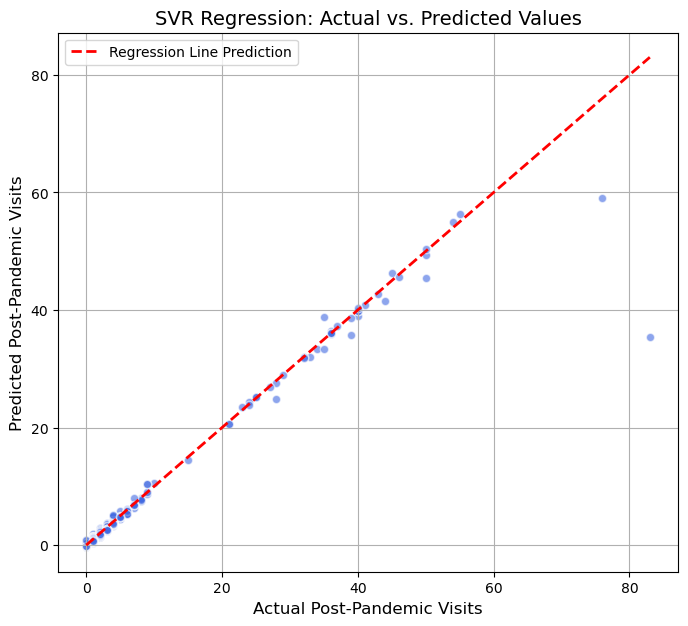

In [45]:
df_compare = pd.DataFrame(
    {
        "pre_count": X_test_c["before_visits"], 
        "post_count": y_test_unscaled.flatten(),
        "predicted_post": y_pred_best_unscaled.flatten(),
        "cluster": df_patient.loc[
            y_test_c.index, "cluster"
        ],
    }
)

fig, ax = plt.subplots(figsize=(8, 7))
ax.scatter(
    df_compare["post_count"],
    df_compare["predicted_post"],
    alpha=0.6,
    color="royalblue",
    edgecolors="w",
)
ax.plot(
    [df_compare["post_count"].min(), df_compare["post_count"].max()],
    [df_compare["post_count"].min(), df_compare["post_count"].max()],
    "r--",
    lw=2,
    label="Regression Line Prediction",
)
ax.set_xlabel("Actual Post-Pandemic Visits", fontsize=12)
ax.set_ylabel("Predicted Post-Pandemic Visits", fontsize=12)
ax.set_title("SVR Regression: Actual vs. Predicted Values", fontsize=14)
ax.legend()
ax.grid(True)
plt.show()

因為本次分析做四個群組的病患比較，所以可以直接做一張 2x2 的圖

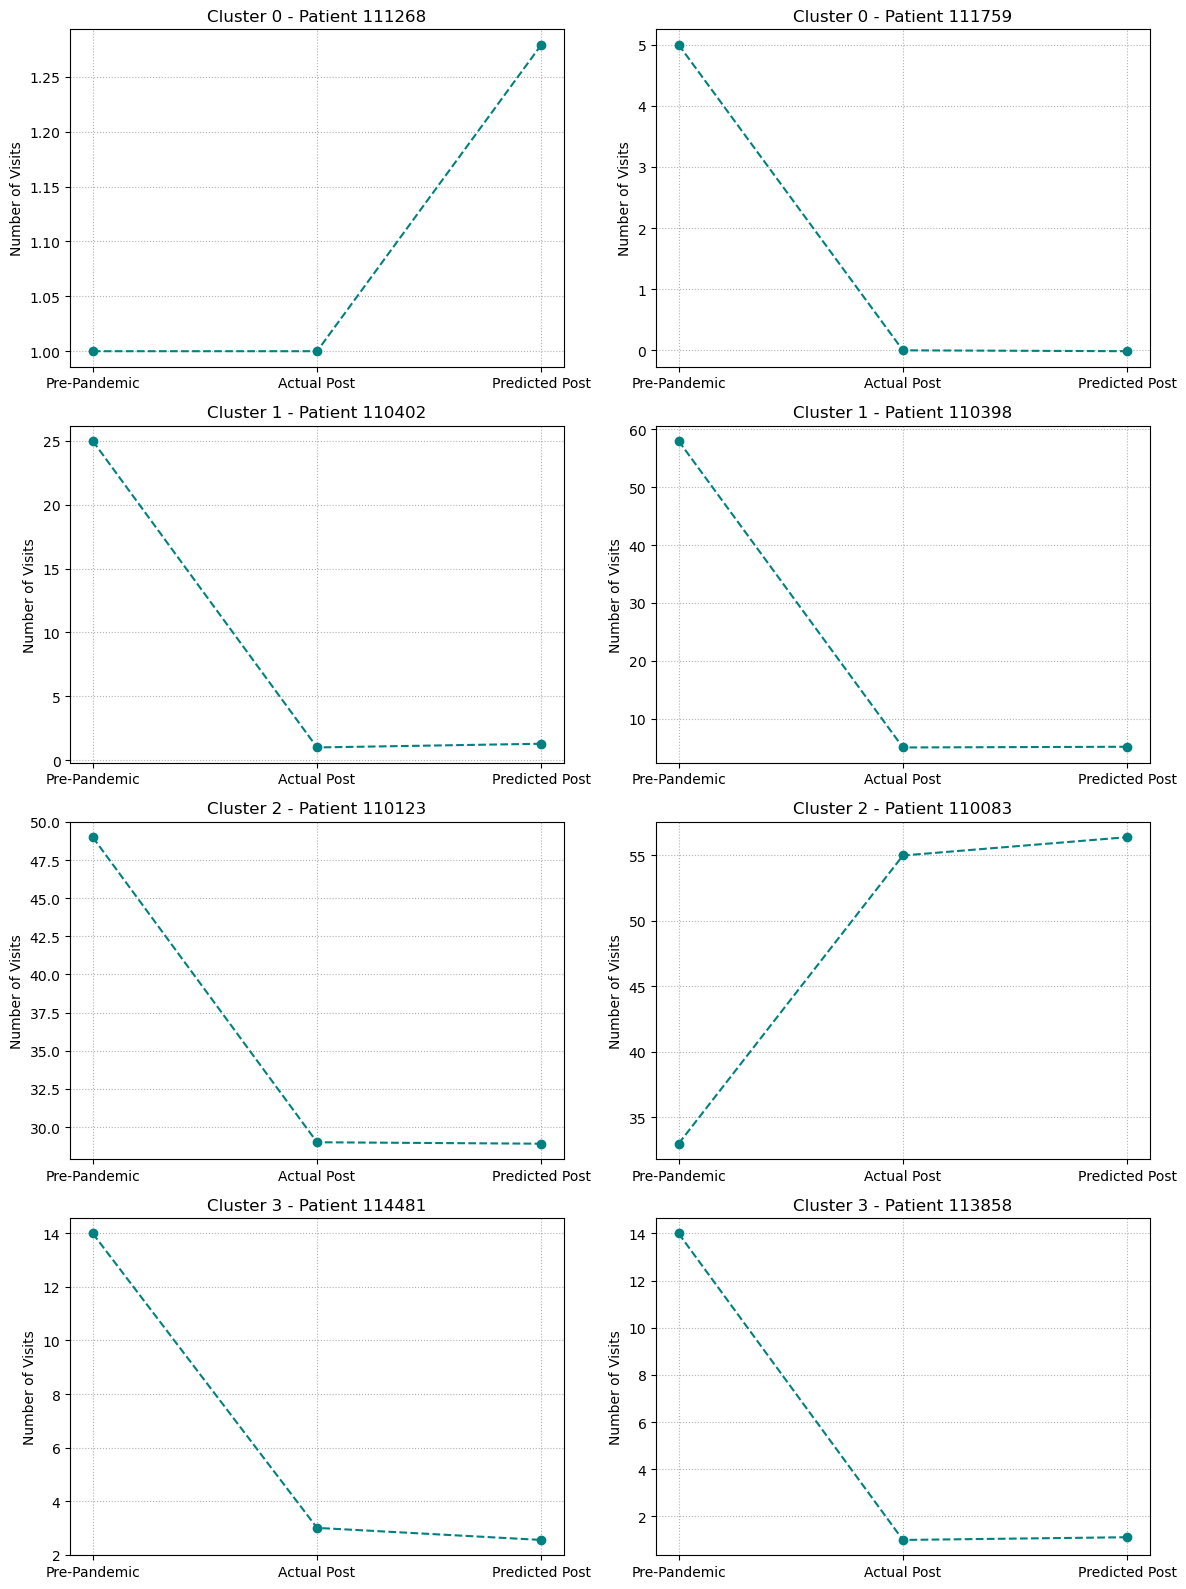

In [46]:
fig, axes = plt.subplots(4, 2, figsize=(12, 16))

for i, cluster_id in enumerate(sorted(df_compare["cluster"].unique())):
    # Filter out the data for this cluster
    cluster_data = df_compare[df_compare["cluster"] == cluster_id]
    samples = cluster_data.sample(2, random_state=42)

    # Draw the plots for two patients on the left and right subplots respectively
    for j, (patient_id, row) in enumerate(samples.iterrows()):
        ax = axes[i, j]
        ax.plot(
            ["Pre-Pandemic", "Actual Post", "Predicted Post"],
            [row["pre_count"], row["post_count"], row["predicted_post"]],
            marker="o",
            linestyle="--",
            color="teal",
        )
        ax.set_title(f"Cluster {cluster_id} - Patient {patient_id}", fontsize=12)
        ax.set_ylabel("Number of Visits")
        ax.grid(True, linestyle=":")

plt.tight_layout()
plt.show()

### === 以上是作業參考解答 ===